**Trabalho de Datascience**

**Alunos: João Pedro dos Santos Nunes - 202004720**
          
**Victor Shin Iti Kanazawa Noda - 201905474**

**Aprendizado Supervisionado**
- Aprendizado supersionado consiste em modelos que buscam realizar a melhor aproximação possível, com base em uma função de aproximação f(X) = y, para a qual busca-se o melhor x ue leva a uma melhor saída y.
- Esses modelos funcionam como uma caixa preta, em que, na maioria das vezes, não conseguimos saber qual a função que está sendo usada
- Nessas técnicas, nós agimos como professores, em que fornecemos um conjunto de dados previamente classificados, o conjunto de treinamento, para o algoritmo, para que ele possa aprender os padrões e relações associadas entre esses dados e as suas classes, e saber como realizar a classificação.
- Depois mós validamos o algoritmo com um conjunto de teste, mas agora, os dados não estão classificados, quem deverá fazer a classificação é o próprio algoritmo.
- Com base nessa etapa de testes, nós verificamos o erro obtido pelo algoritmo, e então realizamos os ajustes necessários.

   ***Support Vector Machines (SVM)***

> O que é:

- Modelo de aprendizado supervisionado muito utilizado em problema de regressão e classificação;

- Funciona muito bem com espaços de grandes dimensões e pode ser usado de forma eficiente em datasets pequenos;

- Ele faz a classificação criando um hiperplano que separam os dados em duas classes;

- Kernel Trick: Quando os dados não são linearmente separáveis, o algoritmo cria um parâmetro a mais capaz de relacionar as outras variáveis. Com isso, estabelece um hiperplano de margem máxima que divide as observações, buscando maximizar a distância entre as observações mais próximas e o hiperplano;

- A importância de achar a margem ideal é tentar evitar overfiting, buscando dividir os dados em classes bem definidas;

- São testasdos vários hiperplanos até achar o melhor;

- Os pontos (observações) mais próximas do hiperplano são chamadas support vectors, porque elas definem o limite do hiperplano;



> Vantagens:


- Efetivo com espaços de alta dimensão e datasets pequenos (dimensão maior que o número de amostras);

- Vesatilidade: diferentes kernels podem ser especificados na função de decisão;

- Uso dos vetores de suport para treinamento da função de decisão, economizando memória (são um subconjunto das amostras);

- Pode ser regularizado para evitar overfiting

- Algoritmo bom em generalizar, o que o torna útil em problemas de classificação

- Robusto a ruidos, uma vez que o treinamento é feito no limite da margem (support vectors)

- Modelagem de margem não linear com o Kernel Trick



> Desvantagens:

- Quando o número de parâmetros é muito maior que o número de amostras, para evitar overfiting, é crucial uma regularização juntamente com a escolha de um kernel adequado;

- Não funciona muito bem na presença de muito ruído no dataset (classes sobrepostas)

- Armazenamento da matriz de Kernel, o que pode se tornar muito grande para datasets muito grandes

- Requer datasets completos, sem valores faltando

- SVM's não fornecem estimativas de probabilidade diretamente, isso é feito usando uma validação cruzada com grande custo computacional.



> Casos de Uso:

- Detecção Facial e expressão facial
- Classificação de texturas de superfícies
- Categorização de textos, e reconhecimento de caligrafia
- Reconhecimento de fala
- Detecção de câncer


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [ ]:
# Import dataset
df_net = pd.read_csv('/content/sample_data/Social_Network_Ads.csv')
df_net.head()

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

In [ ]:
# Get required data
df_net.drop(columns = ['User ID'], inplace=True)
df_net.head()

Gender  Age  EstimatedSalary  Purchased
0    Male   19            19000          0
1    Male   35            20000          0
2  Female   26            43000          0
3  Female   27            57000          0
4    Male   19            76000          0

In [ ]:
# Describe data
df_net.describe()

Age  EstimatedSalary   Purchased
count  400.000000       400.000000  400.000000
mean    37.655000     69742.500000    0.357500
std     10.482877     34096.960282    0.479864
min     18.000000     15000.000000    0.000000
25%     29.750000     43000.000000    0.000000
50%     37.000000     70000.000000    0.000000
75%     46.000000     88000.000000    1.000000
max     60.000000    150000.000000    1.000000

<ipython-input-90-34f7a421ef24>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_net['EstimatedSalary'])


<Axes: xlabel='EstimatedSalary', ylabel='Density'>

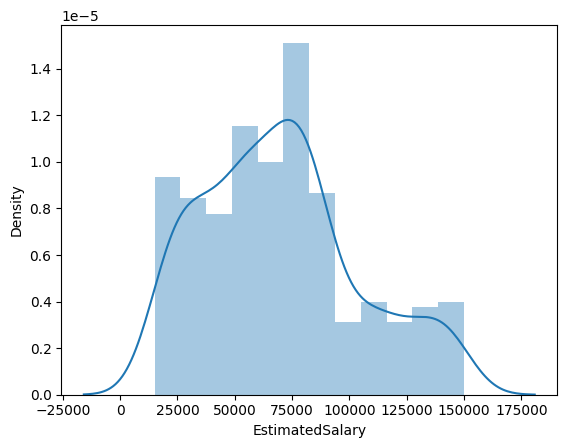

In [ ]:
# Salary distribution
sns.distplot(df_net['EstimatedSalary'])

In [ ]:
# Label encoding
le = LabelEncoder()
df_net['Gender']= le.fit_transform(df_net['Gender'])

In [ ]:
df_net.corr()

Gender       Age  EstimatedSalary  Purchased
Gender           1.000000 -0.073741        -0.060435  -0.042469
Age             -0.073741  1.000000         0.155238   0.622454
EstimatedSalary -0.060435  0.155238         1.000000   0.362083
Purchased       -0.042469  0.622454         0.362083   1.000000

<Axes: >

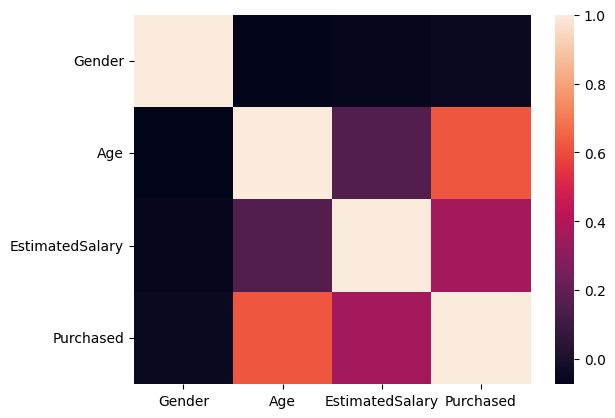

In [ ]:
sns.heatmap(df_net.corr())

In [ ]:
# Drop Gender column
df_net.drop(columns=['Gender'], inplace=True)

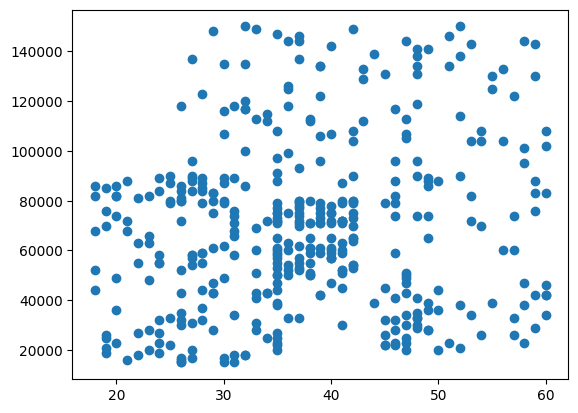

In [ ]:
# Linear relationship between Age and Salary
plt.scatter(df_net['Age'], df_net['EstimatedSalary'])

In [ ]:
# Split data into dependent/independent variables
X = df_net.iloc[:, :-1].values
y = df_net.iloc[:, -1].values

In [ ]:
# Split dataset into test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = True)

In [ ]:
# Scale dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Train Support Vector Machine model
classifier = SVC(kernel = 'linear', random_state = 0, probability = True)
classifier.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=0)

In [ ]:
# Prediction
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]]


In [ ]:
# Accuracy
accuracy_score(y_test, y_pred)

0.82

In [ ]:
# Classification report
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        58
           1       0.83      0.71      0.77        42

    accuracy                           0.82       100
   macro avg       0.82      0.81      0.81       100
weighted avg       0.82      0.82      0.82       100



In [ ]:
# F1 score
print(f"F1 Score : {f1_score(y_test, y_pred)}")

F1 Score : 0.7692307692307692


<Axes: >

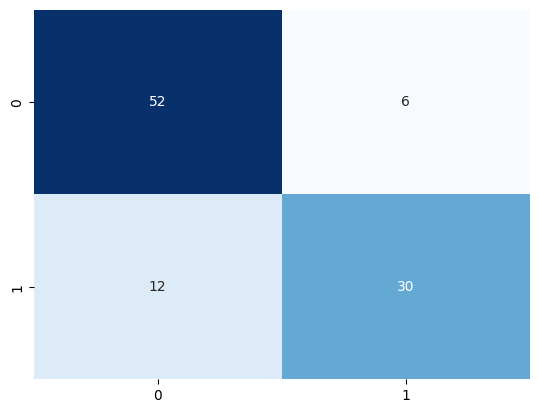

In [ ]:
# Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

<ipython-input-122-e0bbafb31de2>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


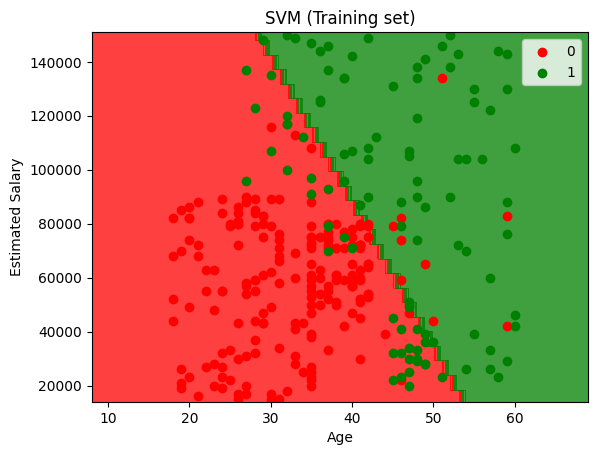

In [ ]:
# Visualize prediction results on training set
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

<ipython-input-123-82e53f59f39d>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


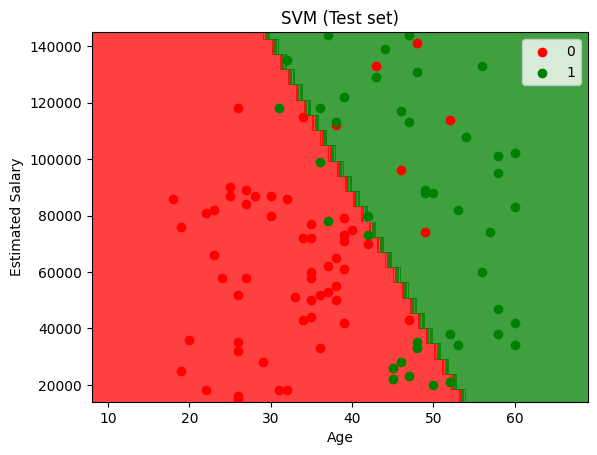

In [ ]:

# Visualize prediction results on test set
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


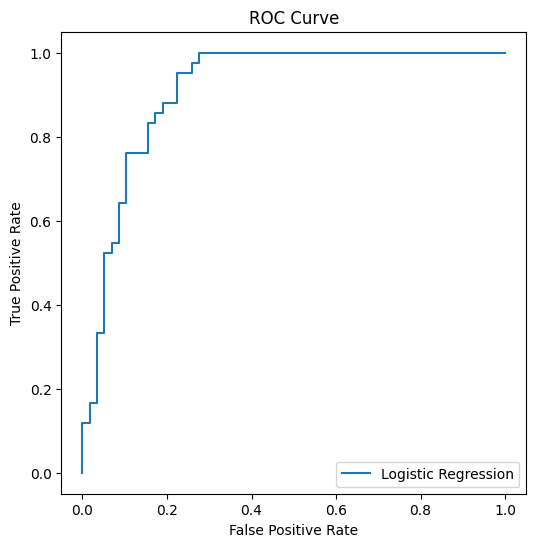

In [ ]:
# Plot AUC/ROC curve
y_pred_proba = classifier.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='Logistic Regression')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve')
ax.legend();

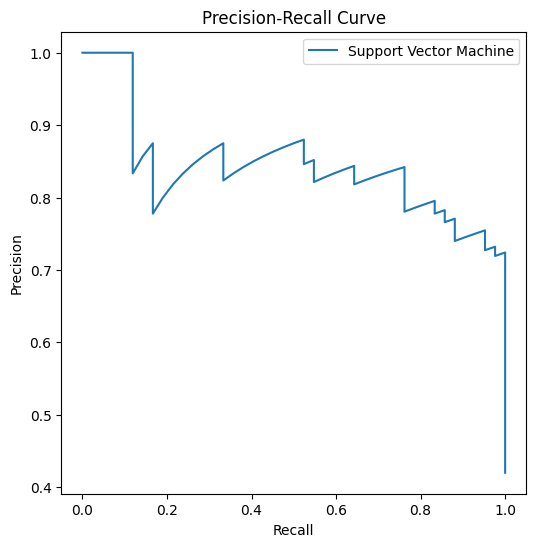

In [ ]:
# Plot Precision-Recall Curve
y_pred_proba = classifier.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(recall, precision, label='Support Vector Machine')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Precision-Recall Curve')
ax.legend();

**Naïve Bayes Calssifier**

> O que é:
- Usado para classificação
- Classificador probabilístico baseado no teorema de Bayes
- Um método que permite a construção de classificadores de maneira simples e direta
- Funciona muito bem com datasets muito pequenos
- Parte da premissa de que todos os atributos são independentes
- Teorema de Bayes:
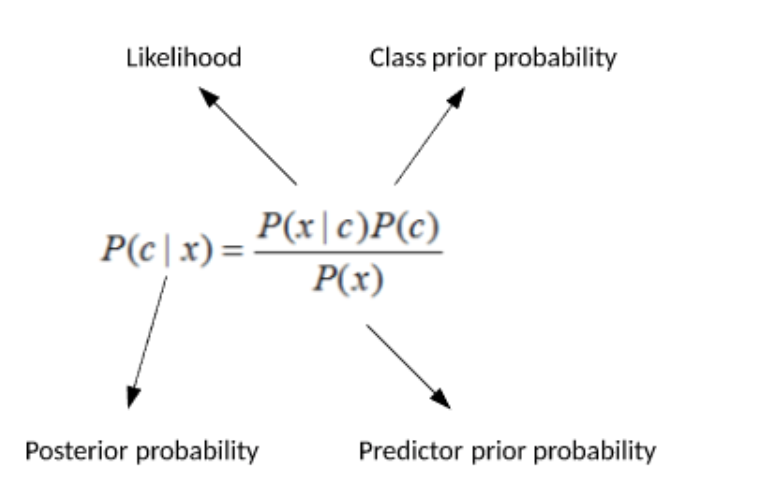
- O teorema de Bayes altera a probabilidade condicional, no sentido de que informações adicionais podem alterar a probabilidade de um evento.


> **Tipos de Calssificadores Naïve Bayes**

> Naïve Bayes Gaussiano
- Variante do modelo que usa distribuições gaussianas para os atributos (ex: Distribuição normal) e variáveis contínuas
- Esse modelo é ajustado achando a média e o desvio padrão de cada classe

> Naïve Bayes Multinominal
- Esse modelo assume que os atributos possuem distribuição multinominal, que por sua vez é uma generalização da distribuição binomial.
- Sendo assim, possui um conjunto discreto de possíveis valores para as variáveis, fazendo com que o modelo seja útil quando usado para variáveis discretos, como contagem de frequência de um determinado evento.
- Muito usado em problemas de processamento de linguagem natural, como classificação de spam

> Bernoulli Naïve Bayes
- Variante usada com variáveis booleanas

> **Vantagens**
- Modelo mais simples: Modelo mais simples quando comparado com outros, fazendo com que tenha uma grande curva de aorendizado
- Alta capacidade de generalização e gasta pouca memória
- Capaz de lidar com grande volume de dados
- Quando a suposição de independência de variáveis funciona bem, o modelo consegue uma acurácia fora do normal

> **Desvantagens**
- Sujeito a frequência zero: Frequência zero ocorre quando uma variável categórica não aparece no dataset de treinamento, fazendo com que sua probabilidade seja zero, e portanto, probabilidades posteriores associadas a essa variável também serão zero. Esse problema pode ser evitado com a suavização de la place.
- Suavização de La place leva a uma sobrecarga computacional adicional
- Se a suposição de independência de variáveis não funcionar bem, o modelo tem uma acurácia muito baixa
- Quando utilizados valores pequenos no calculo de probabilidade, o teorema de bayes tende a zero, exemplo: (0.005)^3

> **Aplicações**
- Detecção de spam
- Classificação de documentos
- Análise de sentimental
- Predição de injúrias mentais


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [ ]:
# Read dataset
df_net = pd.read_csv('/content/sample_data/Social_Network_Ads.csv')
df_net.head()

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

In [ ]:
# Get required data
df_net.drop(columns = ['User ID'], inplace=True)
df_net.head()


Gender  Age  EstimatedSalary  Purchased
0    Male   19            19000          0
1    Male   35            20000          0
2  Female   26            43000          0
3  Female   27            57000          0
4    Male   19            76000          0

In [ ]:
# Describe data
df_net.describe()

Age  EstimatedSalary   Purchased
count  400.000000       400.000000  400.000000
mean    37.655000     69742.500000    0.357500
std     10.482877     34096.960282    0.479864
min     18.000000     15000.000000    0.000000
25%     29.750000     43000.000000    0.000000
50%     37.000000     70000.000000    0.000000
75%     46.000000     88000.000000    1.000000
max     60.000000    150000.000000    1.000000

<ipython-input-5-34f7a421ef24>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_net['EstimatedSalary'])


<Axes: xlabel='EstimatedSalary', ylabel='Density'>

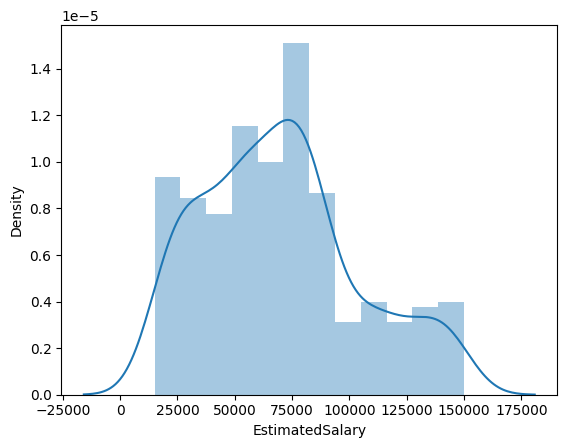

In [ ]:
# Salary distribution
sns.distplot(df_net['EstimatedSalary'])

In [ ]:
# Label encoding
le = LabelEncoder()
df_net['Gender']= le.fit_transform(df_net['Gender'])

<Axes: >

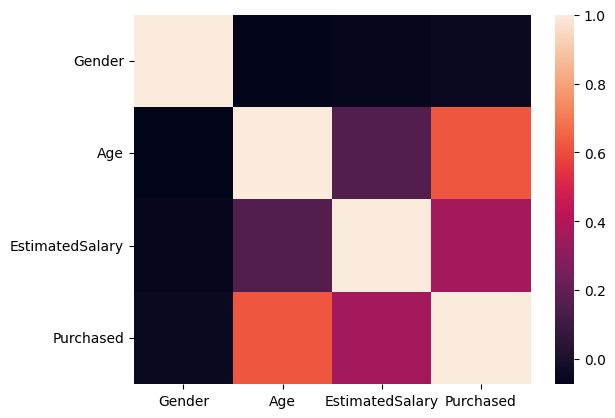

In [ ]:
# Correlation matrix
df_net.corr()
sns.heatmap(df_net.corr())

In [ ]:
# Drop Gender column
df_net.drop(columns=['Gender'], inplace=True)

In [ ]:
# Split data into dependent/independent variables
X = df_net.iloc[:, :-1].values
y = df_net.iloc[:, -1].values

In [ ]:
# Split data into test/train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = True)

In [ ]:
# Scale dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Classifier
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Prediction
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]]


In [ ]:
# Accuracy
accuracy_score(y_test, y_pred)

0.86

In [ ]:
# Classification report
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        58
           1       0.83      0.83      0.83        42

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100



In [ ]:
# F1 score
print(f"F1 Score : {f1_score(y_test, y_pred)}")

F1 Score : 0.8333333333333334


<Axes: >

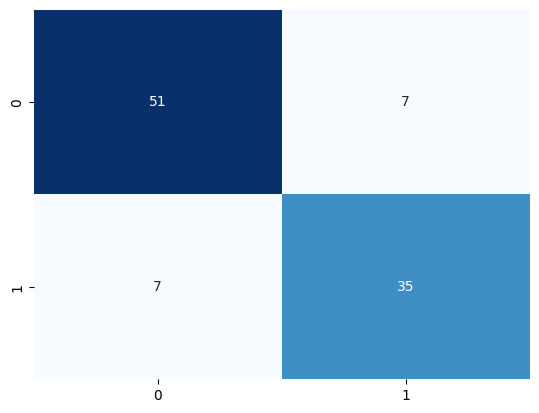

In [ ]:
# Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)


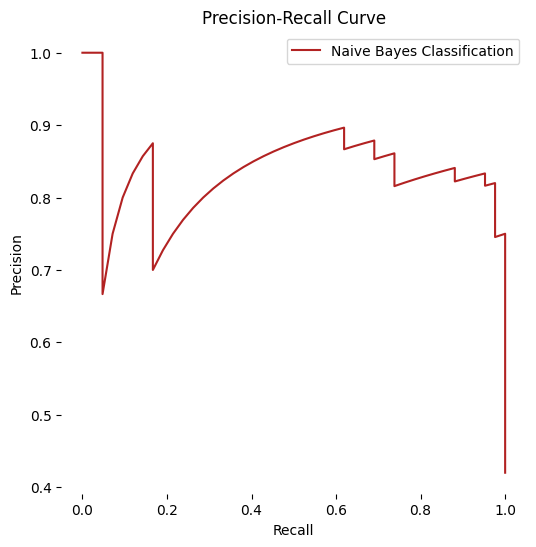

In [ ]:
# Plot Precision-Recall Curve
y_pred_proba = classifier.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(recall, precision, label='Naive Bayes Classification', color = 'firebrick')
ax.set_title('Precision-Recall Curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
plt.box(False)
ax.legend();

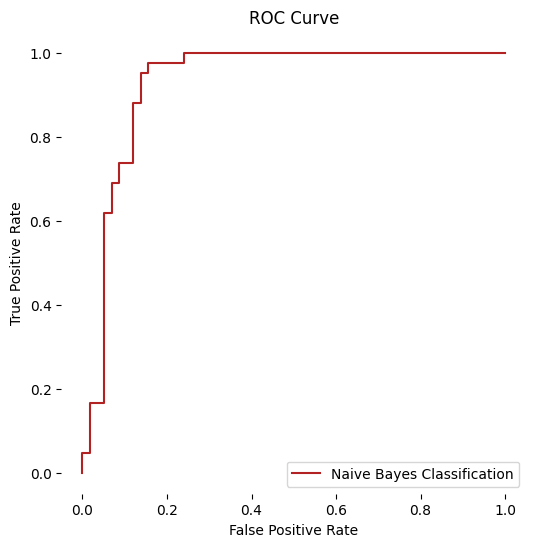

In [ ]:
# Plot AUC/ROC curve
y_pred_proba = classifier.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='Naive Bayes Classification', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend();

<ipython-input-21-a6bab2667fbf>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


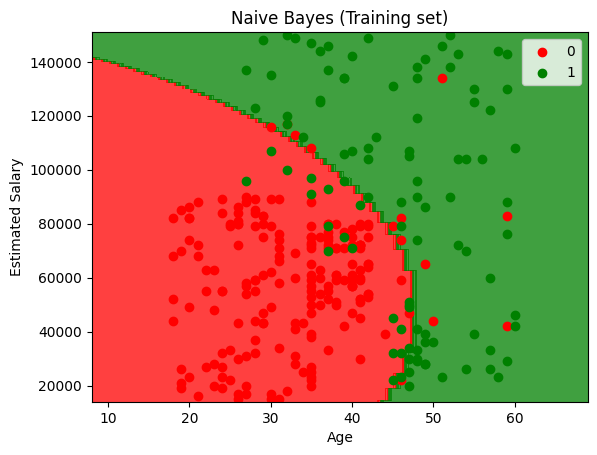

In [ ]:
# Visualize prediction results on training set
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

<ipython-input-22-a721b2449967>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


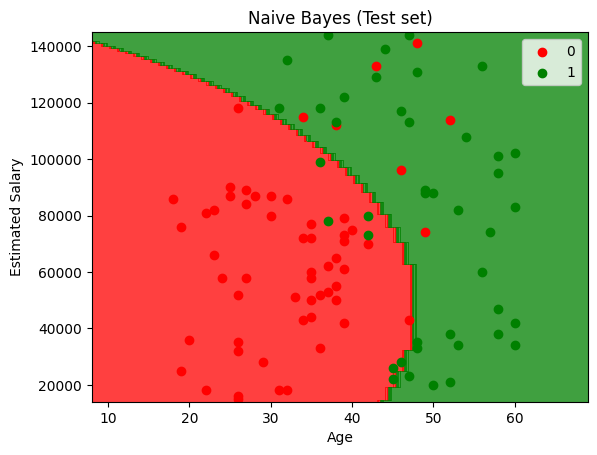

In [ ]:
# Visualize prediction results on test set
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

**K-Nearest Neighbors Algorithm**
> **O que é:**
- Algoritmo de aprendizado supersionado não paramétrico
- Usa proximidade para fazer classificações ou prediçoes a respeito de um determinado grupo de dados
- Pode ser usado para classificação e regressão, sendo mais usado para classificação
- Parte da premissa de que amostras (pontos) similares podem ser achadas perto uma das outras
- Para problemas de classificação, o rótulo de uma amostra (etiqueta) é escolhida com base no voto majoritário. Exemplo: Um ponto é classificado com base na classe que mais aparece em torno dele
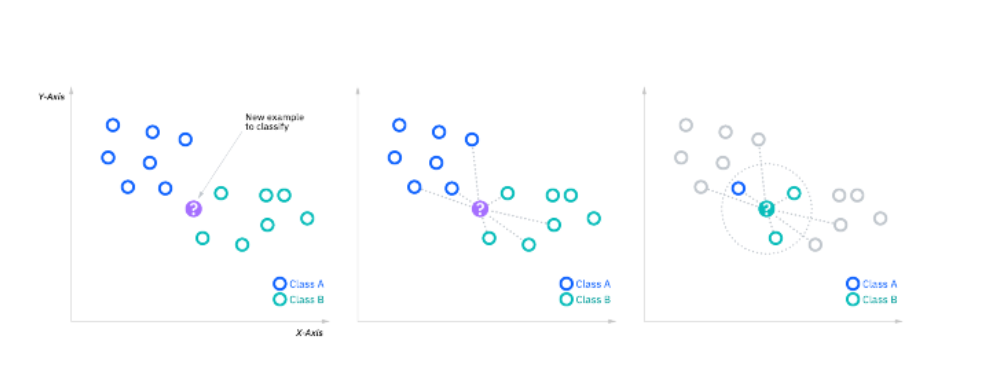
- Para problemas de regressão, o processo é semelhante, porém, dessa vez, a média dos k vizinhos mais próximos é tomada para se fazer uma predição a respeito da classe
- Antes de uma classificação ser feita, seja em problemas de predição, ou de regressão, uma distância deve ser definida
- A distância Euclidiana é a mais comum a ser feita
- KNN algortihm é parte da família de modelos "lazy learning", o que significa que ele apenas armazena um dataset de treinamento, em vez de passar por um estágio de treinamento
- Isso também significa que ele faz todos os cálculos necessários durante a classificação ou regressão
- Esse método se apoia firmemente no uso de memória para armazenar o dataset de treinamento, fazendo com que ele seja conhecido como memory-based learning method
- Outra métrica importante para o sistema é o valor de k, que define quantos k vizinhos vão ser olhados para fazer uma classificação ou predição.
- ALgoritmo simples e com boa acurácia
- Quando o dataset cresce, o modelo se torna muito ineficiente
- Muito usado em reconhecimento de padrões, sistemas de recomendação, data mining, predições de mercado financeiro, etc.

> **Vantagens:**
- Fácil de implementar
- Se adapta facilmente a novos dados de treinamento, uma vez que eles estão armazenados na memória
- Poucos hiperparâmetros: precisa somente do valor de k e da metrica de distância

> **Desvantagens:**
- Não é escalável: o uso de memória e armazenamento cresce a medida que o dataset cresce, levando a um maior tempo gasto e deixando a solução mais cara
- Sujeito à maldição da dimensionalidade: quando a quantidade de atributos ultrapassa a quantidade ótima, o modelo começa a ter muitos erros, especialmente quando a quantidade de amostras é baixo
- Propenso a overfitting: Devido à maldição da dimensionalidade, o algoritmo KNN é mais propenso a overfitting. Além disso, o valor de k pode impactar diretamente na performance do modelo, de forma que baixos valores de k podem provocar overfitting, e valores de k muito altos podem "suavizar" as predições, uma vez que, é tomada a média dos valores em uma grande área. Logo, se os valores de k forem muito altos, pode haver underfitting

> **Aplicações:**
- Processamento de dados
- Sistemas de recomendações
- Reconhecimento de padrões
- Finanças
- Cuidados com a saúde


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [ ]:

# Read dataset
df_net = pd.read_csv('/content/sample_data/Social_Network_Ads.csv')
df_net.head()

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

In [ ]:
# Get required data
df_net.drop(columns = ['User ID'], inplace=True)
df_net.head()

Gender  Age  EstimatedSalary  Purchased
0    Male   19            19000          0
1    Male   35            20000          0
2  Female   26            43000          0
3  Female   27            57000          0
4    Male   19            76000          0

In [ ]:
# Describe data
df_net.describe()

Age  EstimatedSalary   Purchased
count  400.000000       400.000000  400.000000
mean    37.655000     69742.500000    0.357500
std     10.482877     34096.960282    0.479864
min     18.000000     15000.000000    0.000000
25%     29.750000     43000.000000    0.000000
50%     37.000000     70000.000000    0.000000
75%     46.000000     88000.000000    1.000000
max     60.000000    150000.000000    1.000000

<ipython-input-27-34f7a421ef24>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_net['EstimatedSalary'])


<Axes: xlabel='EstimatedSalary', ylabel='Density'>

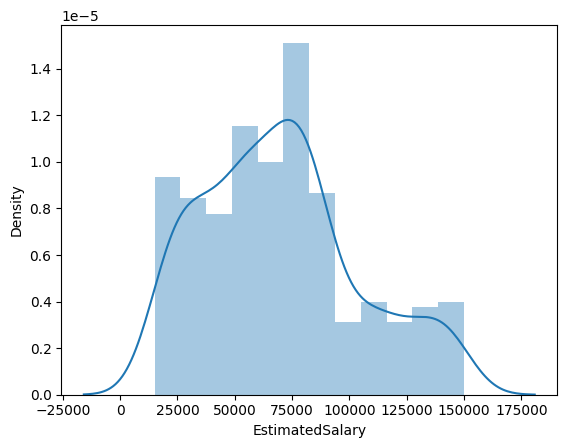

In [ ]:
# Salary distribution
sns.distplot(df_net['EstimatedSalary'])

In [ ]:

# Label encoding
le = LabelEncoder()
df_net['Gender']= le.fit_transform(df_net['Gender'])

In [ ]:

# Correlation matrix
df_net.corr()

Gender       Age  EstimatedSalary  Purchased
Gender           1.000000 -0.073741        -0.060435  -0.042469
Age             -0.073741  1.000000         0.155238   0.622454
EstimatedSalary -0.060435  0.155238         1.000000   0.362083
Purchased       -0.042469  0.622454         0.362083   1.000000

<Axes: >

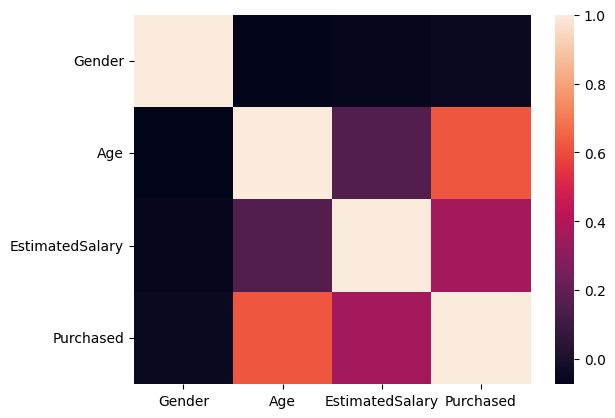

In [ ]:
sns.heatmap(df_net.corr())

In [ ]:

# Drop Gender column
df_net.drop(columns=['Gender'], inplace=True)
df_net.head()

Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0

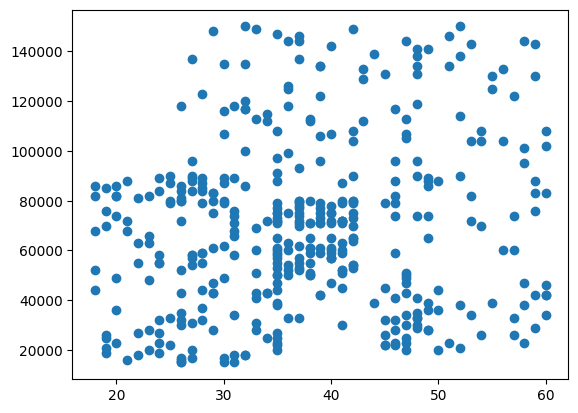

In [ ]:

# Relationship between Age and Salary
plt.scatter(df_net['Age'], df_net['EstimatedSalary'])

In [ ]:

# Split data into dependent/independent variables
X = df_net.iloc[:, :-1].values
y = df_net.iloc[:, -1].values

In [ ]:

# Split dataset into test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = True)

In [ ]:
# Scale dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Train K-Nearest Neighbour model
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:

# Prediction
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]]


In [ ]:

# Accuracy
accuracy_score(y_test, y_pred)

0.88

In [ ]:
# Classification report
print(f'Classification Report (Logistic Regression) : \n{classification_report(y_test, y_pred)}')

Classification Report (Logistic Regression) : 
              precision    recall  f1-score   support

           0       0.93      0.86      0.89        58
           1       0.83      0.90      0.86        42

    accuracy                           0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100



In [ ]:
# F1 score
print(f"F1 Score : {f1_score(y_test, y_pred)}")

F1 Score : 0.8636363636363636


<Axes: >

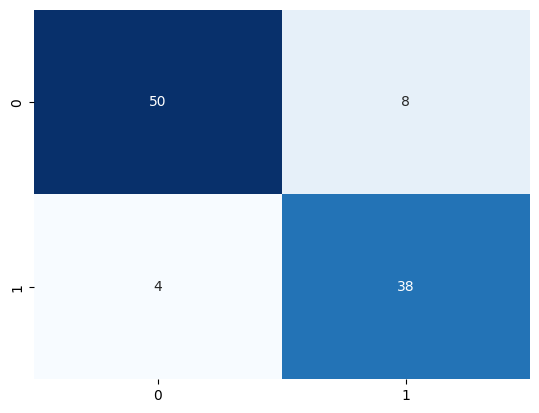

In [ ]:
# Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

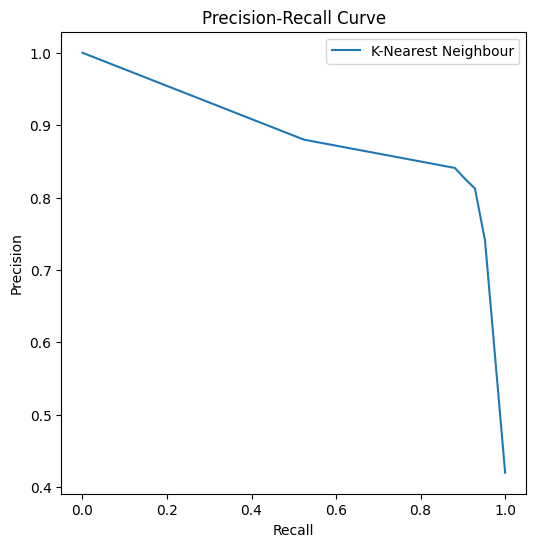

In [ ]:
# Plot Precision-Recall Curve
y_pred_proba = classifier.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(recall, precision, label='K-Nearest Neighbour')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Precision-Recall Curve')
ax.legend();

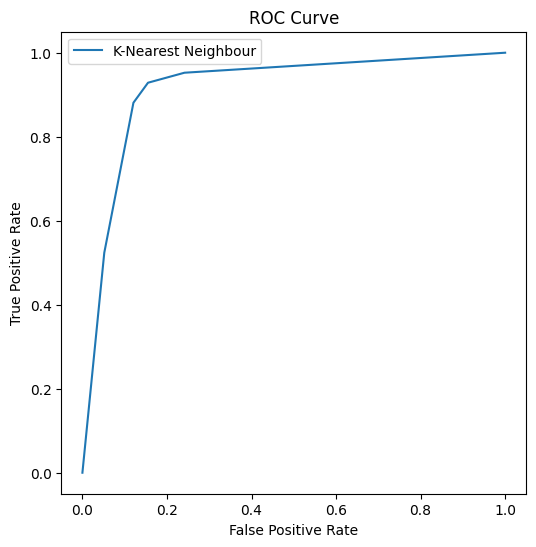

In [ ]:
# Plot AUC/ROC curve
y_pred_proba = classifier.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)

# Plot ROC curve
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='K-Nearest Neighbour')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve')
ax.legend();

<ipython-input-45-ddd45bfe1bed>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


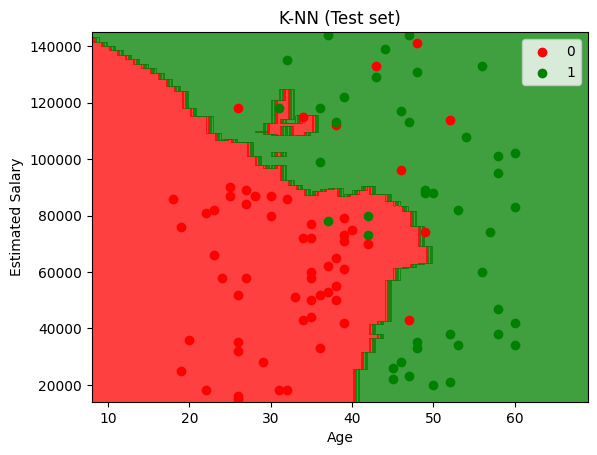

In [ ]:
# Visualize prediction results om test dataset
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

**Ávores de Decisão**
> **O que é:**
- Algoritmo de aprendizado supersionado não-paramétrico utilizado tanto para regressão como para classificação
- Estrutura de árvore hieráquica: raíz, ramos, nós internos e nós folhas
 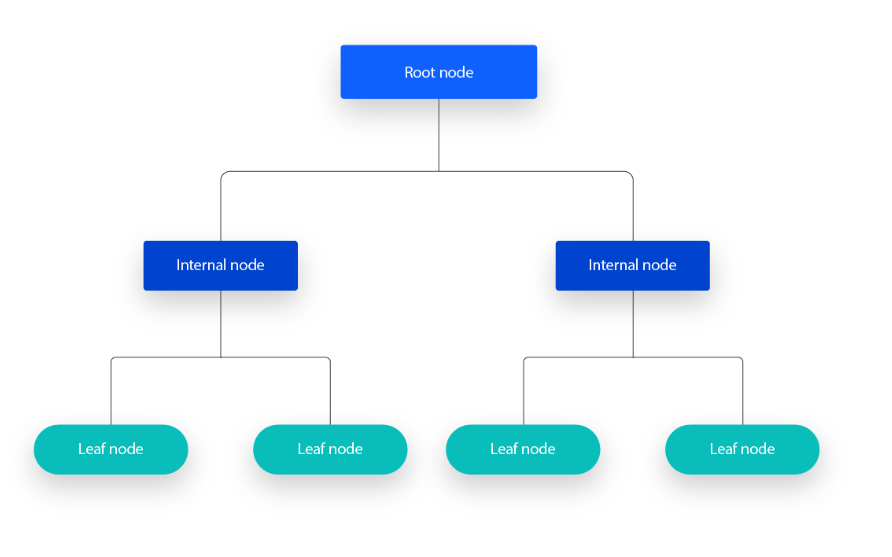
- A medida que vai caminhando pelos ramos, maior a especificidade
- Os nós folhas representam todas as saídas possíveis
- Os nós internos representam nós de decisão
- A estrutura permite um fácil entendimento da tomada de decisão do algoritmo
- Permite o emprego da estratégia "dividir para conquistar", onde é realizada uma busca dos melhores pontos de divisão da árvore
- O processo de divisão é repetido em uma maneira recursiva, em uma forma top-down, até que todos ou a maioria dos registros tenham sido classificados.
- Se todos os dado são classificados corretamente ou não, depende da complexidade da árvore
- Árvores menores tem uma capacidade de generalização maior, tornando a classificação mais correta, enquanto árvores de profundidade muito grande se tornam muito específicas, facilitando a ocorrência de overfitting
- "Entidades não deveriam ser multiplicadas sem necessidade" - princípio da parcimônia
- Preferêncioa por árvores menores
- Para reduzir a complexidade e prevenir overfitting, geralmente é usada a poda da árvore, em que ramos que derivam características supérfluas são retirados
- O algoritmo pode ser validado através da validação cruzada

>**Tipos de árvores de Decisão**
- O algoritmo de Hunt, que foi desenvolvido nos anos 1960, para modelar o aprendizado humano, forma a base dos algoritmos de árvores de decisão
- **ID3**: Desnvolvido por Ross Quinlan, esse algoritmo aproveita do ganho de entropia e informação como métricas para avaliar os pontos de divisão
- **C4.5**: Considerado o último avanço do algoritmo ID3, também desenvolvido por Ross Quinlan, usa o ganho de informação ou taxas de ganho para validar os splits
- **CART**: Classification and Registration Trees (CART), criado por Leo Breiman, e utiliza a Impureza de Gini, para identificar o atributo ideal para se fazer o split. A Impureza de Gini mede a frequência com que um atributo escolhido aleatoriamente é classificado de forma errada. Utilizando a Impureza de Gini, uma árvore com menor profundidade é escolhida como ideal.

> **Métricas para a divisão da árvore**
- As principais métricas usadas na hora de fazer um split é o ganho de informação e a impureza de Gini
- **Entropia**: Mede a quantidade de impureza associada a um dataset
- É representada por um valor entre 0 e 1, em que zero representa um dataset sem impurezas, onde todas as amostras são classificadas em uma classe só, e 1 representa a situação em que metade das amostras são classificadas em uma classe, e outra metade em outra classe.
- É calculada pela seguinte fórmula:
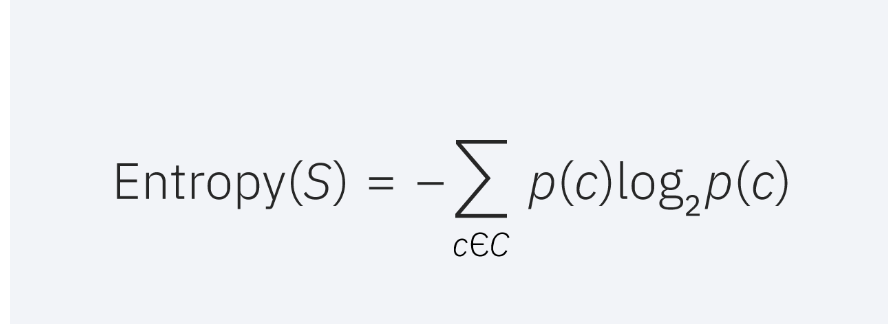
- S reprsenta o dataset a ser avaliado
- c representa uma classe dentro do conjunto de classes C no dataset S
- p(c) representa proporção de pontos que pertencem a classe c, em relação a todos os pontos do dataset S
-**Ganho de informação**: A diferença de entropia antes e depois de um split em um dado atributo
- O atributo com o maior ganho de informação vai produzir o melhor split, com o objetivo de realizar a melhor classificação possível
- 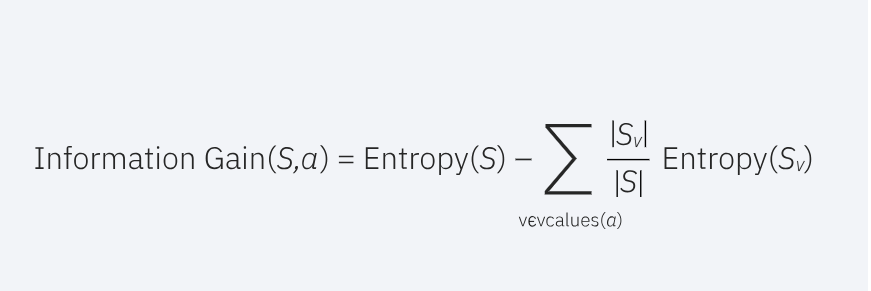
- a representa um atributo específico ou rótulo de uma classe
- Sv/S representa a proporção de valores em Sv para o total de valores em S
- Sv é um novo dataset, originado do split feito em s
-**Impureza de Gini**
- É a probabilidade de fazer uma classificação incorreta de um valor escolhido aleatoriamente, se esse dado foi classificado baseado na distribuição da classe no dataset
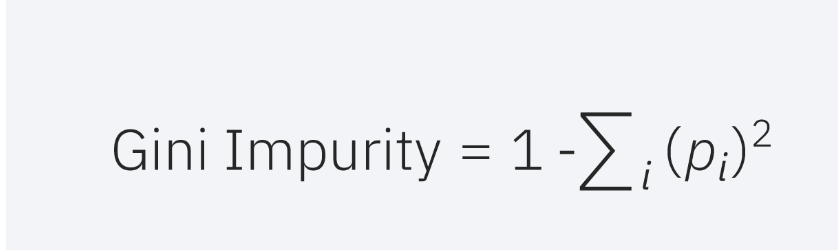

>**Vantagens**
- Fácil interpretação
- Nenhum ou pouca preparação de dados necessária: pode lidar com dados discretos, contínuos e missing values. Versatilidade
- Flexibilidade: pode ser usada para classificação e regressão e é capaz de separar dados com atributos altamente correlacionados.

>**Desvantagens**
- Propensa a overfitting: Pode ser evitado com uma pré-poda, que suspende o crescimento da árvore quando há dados insuficiente, ou uma pós-poda, que retira sub-árvores desnecessárias após a construção da árvore
- Alta variância com os estimadores: pequenas variações nos dados podem levar a uma árvore totalmente diferente. Bagging ou média de estimadores podem corrigir o problema, mas de forma limitada, uma vez que eles podem levar a estimadores altamente correlacionados.
- Custo de treinamento maior, uma vez que os algoritmos fazem uma busca exaustiva para o melhor split

>**Casos de Uso**
- Análise de catões de crédito, para identificar uma transação fraudulenta
- Analisar pacientes para saber quais deles estão propensos a desenvolver uma certa doença
- Previsões de movimentações no mercado de ações
- Previsões a respeito de oportunidades de crescimento com base em um histórico de ações
- Identificar possíveis clientes com base em dados demográficos (marketing direcionado)

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [ ]:
# Read dataset
df_net = pd.read_csv('/content/sample_data/Social_Network_Ads.csv')
df_net.head()

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

In [ ]:
# Get required data
df_net.drop(columns = ['User ID'], inplace=True)
df_net.head()

Gender  Age  EstimatedSalary  Purchased
0    Male   19            19000          0
1    Male   35            20000          0
2  Female   26            43000          0
3  Female   27            57000          0
4    Male   19            76000          0

In [ ]:
# Describe data
df_net.describe()

Age  EstimatedSalary   Purchased
count  400.000000       400.000000  400.000000
mean    37.655000     69742.500000    0.357500
std     10.482877     34096.960282    0.479864
min     18.000000     15000.000000    0.000000
25%     29.750000     43000.000000    0.000000
50%     37.000000     70000.000000    0.000000
75%     46.000000     88000.000000    1.000000
max     60.000000    150000.000000    1.000000

<ipython-input-6-34f7a421ef24>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_net['EstimatedSalary'])


<Axes: xlabel='EstimatedSalary', ylabel='Density'>

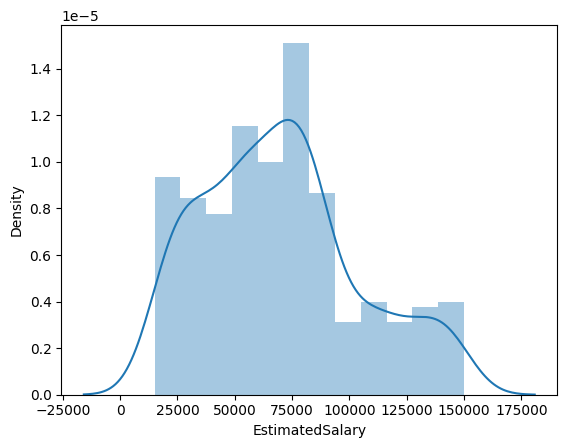

In [ ]:
# Salary distribution
sns.distplot(df_net['EstimatedSalary'])

In [ ]:
# Label encoding
le = LabelEncoder()
df_net['Gender']= le.fit_transform(df_net['Gender'])

In [ ]:
# Correlation matrix
df_net.corr()

Gender       Age  EstimatedSalary  Purchased
Gender           1.000000 -0.073741        -0.060435  -0.042469
Age             -0.073741  1.000000         0.155238   0.622454
EstimatedSalary -0.060435  0.155238         1.000000   0.362083
Purchased       -0.042469  0.622454         0.362083   1.000000

<Axes: >

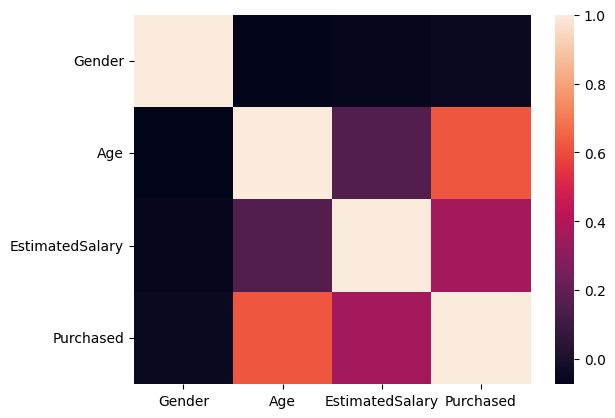

In [ ]:
sns.heatmap(df_net.corr())

In [ ]:
# Drop Gender column
df_net.drop(columns=['Gender'], inplace=True)

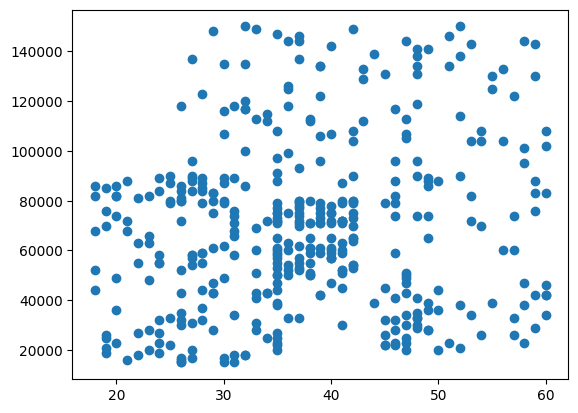

In [ ]:
# Relationship between Age and Salary
plt.scatter(df_net['Age'], df_net['EstimatedSalary'])

In [ ]:
# Split data into independent/dependent variables
X = df_net.iloc[:, :-1].values
y = df_net.iloc[:, -1].values

In [ ]:
# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = True)

In [ ]:
# Scale dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Decision Tree Classification
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
# Prediction
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]]


In [ ]:
# Accuracy
accuracy_score(y_test, y_pred)

0.83

In [ ]:
# Classification report
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.83      0.85        58
           1       0.78      0.83      0.80        42

    accuracy                           0.83       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.83      0.83      0.83       100



In [ ]:
# F1 score
print(f"F1 Score : {f1_score(y_test, y_pred)}")

F1 Score : 0.8045977011494253


<Axes: >

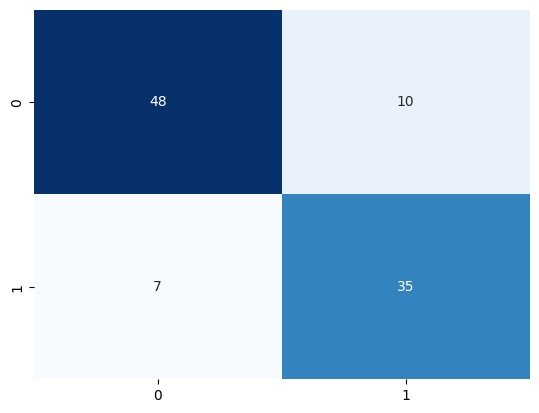

In [ ]:
# Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

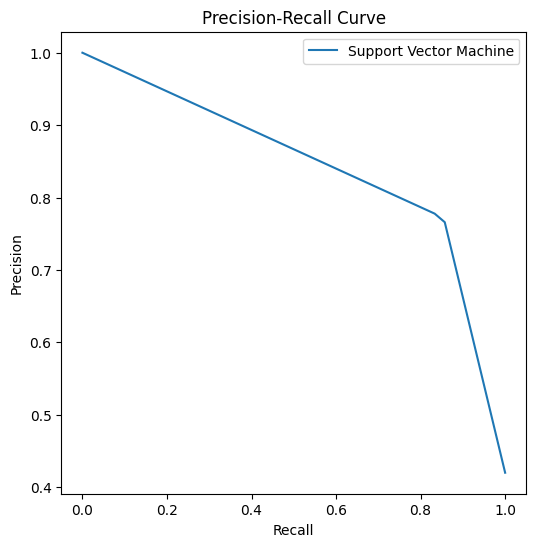

In [ ]:
# Plot Precision-Recall Curve
y_pred_proba = classifier.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(recall, precision, label='Support Vector Machine')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Precision-Recall Curve')
ax.legend();

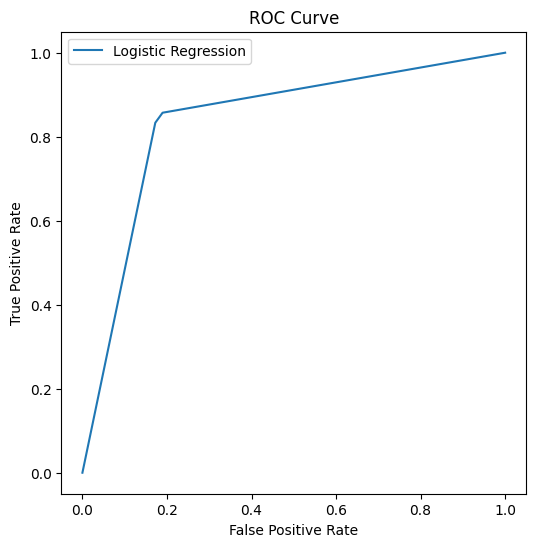

In [ ]:
# Plot AUC/ROC curve
y_pred_proba = classifier.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='Logistic Regression')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve')
ax.legend();

<ipython-input-23-a6bab2667fbf>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


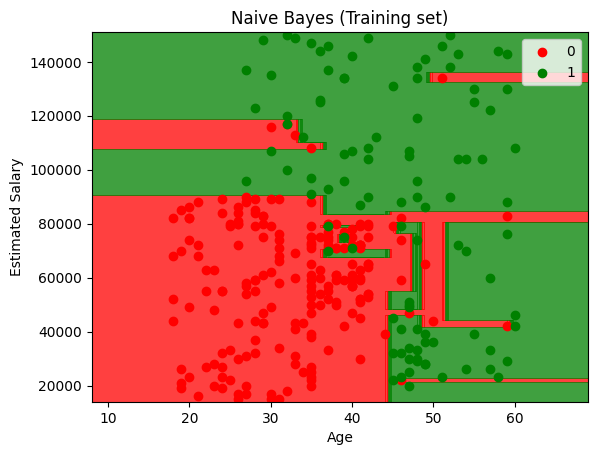

In [ ]:
# Visualize prediction results on training set
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

<ipython-input-24-a721b2449967>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


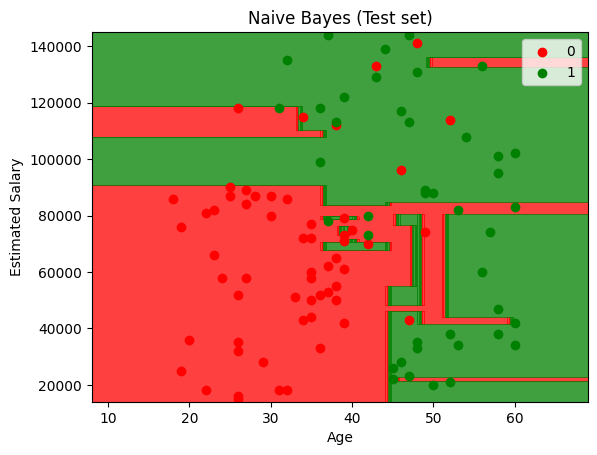

In [ ]:
# Visualize prediction results on test set
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

**Random Forest**

> **O que é:**
- Algoritmo de aprendizado supervisionado que combina a saída de múltiplas árvores de decisão para alcançar um resultado
- Árvores de decisão normais podem estar sujeitas a problemas como polarização e overfitting
- Porém, quando árvores específicas formam um conjunto de árvores no algoritmo de random forest, elas podem fornecer resultados mais eficazes, especialmente quando as árvores possuem menor correlação entre si.

>**Bagging Method**
- Bagging method (método do ensacamento) é um método de conjunto, em que amostras aleatórias do conjunto de treinamento é selecionado com substituição, fazendo com que pontos individuais possam ser selecionados mais de uma vez. Depois de muitas aostras de dados serem geradas, os modelos são treinados de forma independente, e dependendo da tarefa, regressão ou classificação, essa técnica leva a resultados mais precisos. Essa técnica é muito usada para reduzir a variância em um dataset com ruído.

>**Algoritmo Random Forest**
- O algoritmo de random forest é uma extensão do bagging method, uma vez que utiliza o método juntamente com atributos aleatórios para criar uma floresta de árvores de decisão não correlata.
- Aleatoriedade de atributos gera um subconjunto aleatório de atributos que não estão correlacionados entre si.
- Essa é a principal diferença entre árvores de decisão e random forest. Enquanto árvores de decisão consideram todos os splits possíveis, random forest seleciona apenas um subconjunto desses atributos.

>**como funciona**
- o algoritmo possui três hiperparÂmetros que precisam ser configurados antes do treinamento: tamanho do nó, número de árvores e o número de atributos amostrados.
- O algoritmo é composto de uma coleção de árvores de decisão, em que cada árvore é composta por uma amostra de dados gerada de um conjunto de treinamento com substituição, chamada bootstrap sample.
- Desse conjunto de treinamento, um terço é separado para ser realizado o teste, conhecida como out-of-bag sample.
- O restante então é feito o bagging, que adiciona mais diversidade ao conjunto de treinamento, e reduz a correlação entre as árvores de decisão.
- Agora, a maneira de fazer a classificação varia de acordo com o objetivo. Para tarefas de regressão, será realizada a média das decisões das árvores individuais, enquanto para tarefas de classificação, o voto majoritário (a classe que mais aparece) vai representar a classe de classificação.
- Por fim, a amostra de teste é utilizada para validação cruzada
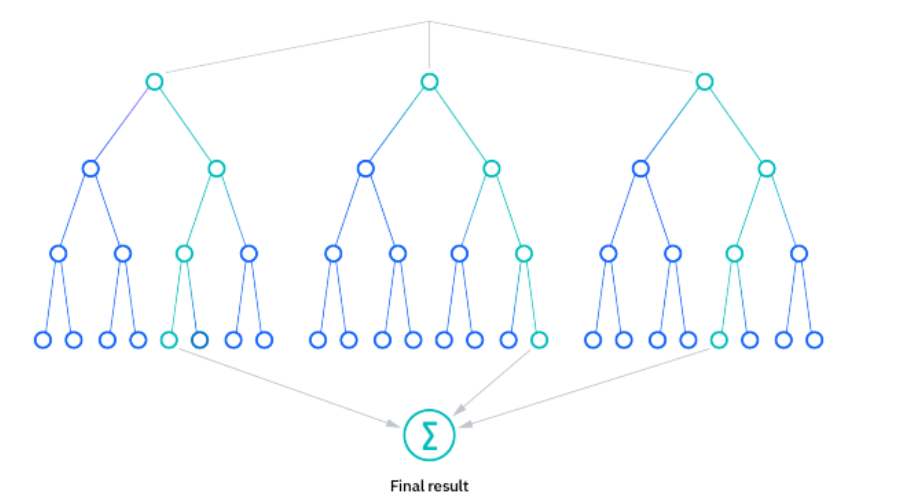

>**Vantagens**
- Menor risco de overfitting: Como nas árvores de decisão, o risco de overfitting é maior, a medida que a profundidade aumenta, aqui, há uma menor quantidade de árvores correlatas, o que reduz o risco de overfitting.
- Flexibilidade: Alta acurácia em tarefas de regressão e classificação, e na presença de datasets incompletos (missing values)
- Fácil determinação da importância de um atributo: Importância de Gini e diminuição média de impureza (MDI) podem ser usados para medir o quanto a acurácia do modelo diminui quando uma variável é retirada. Diminuição média da acurácia (MDA), também pode ser usada, em que é feita a média da diminuiução da acurácia, quando é realizada a permutação aleatória dos elementos contidos na amostra de treinamento.

>**Desvantagens**
- Alto tempo de processamento: Com datasets maiores, o fato de computar bootstrap samples para cada árvore e datasets de treinamento, pode levar a um alto tempo de processamento.
- Maior gasto de recursos: O algoritmo tem que lidar com datasets muito grandes, necessitando de grande quantidade de armazenamento para eles
- MAis complexo de interpretar

>**Casos de Uso**
- Finanças: Identificar clientes com alto riscos de crédito, detectar fraudes, etc.
- Cuidado com a saúde: Predição da resposta do organismo a determinado medicamento
- E-commerce: recomendar produtos para vendas casadas

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [ ]:
# Read dataset
df_net = pd.read_csv('/content/sample_data/Social_Network_Ads.csv')
df_net.head()

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

In [ ]:
# Get required data
df_net.drop(columns = ['User ID'], inplace=True)
df_net.head()

Gender  Age  EstimatedSalary  Purchased
0    Male   19            19000          0
1    Male   35            20000          0
2  Female   26            43000          0
3  Female   27            57000          0
4    Male   19            76000          0

In [ ]:
# Describe data
df_net.describe()

Age  EstimatedSalary   Purchased
count  400.000000       400.000000  400.000000
mean    37.655000     69742.500000    0.357500
std     10.482877     34096.960282    0.479864
min     18.000000     15000.000000    0.000000
25%     29.750000     43000.000000    0.000000
50%     37.000000     70000.000000    0.000000
75%     46.000000     88000.000000    1.000000
max     60.000000    150000.000000    1.000000

<ipython-input-50-34f7a421ef24>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_net['EstimatedSalary'])


<Axes: xlabel='EstimatedSalary', ylabel='Density'>

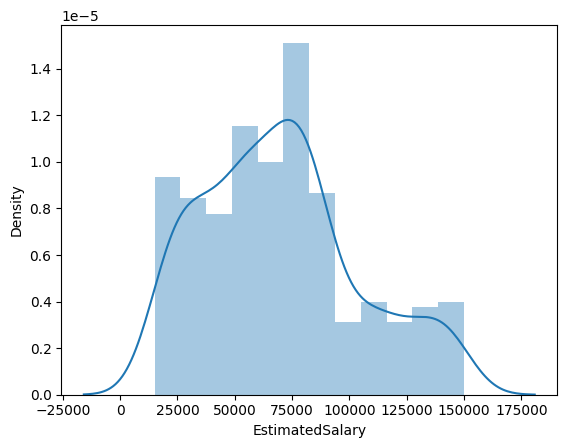

In [ ]:
# Salary distribution
sns.distplot(df_net['EstimatedSalary'])

In [ ]:
# Label encoding
le = LabelEncoder()
df_net['Gender']= le.fit_transform(df_net['Gender'])

In [ ]:
# Correlation matrix
df_net.corr()

Gender       Age  EstimatedSalary  Purchased
Gender           1.000000 -0.073741        -0.060435  -0.042469
Age             -0.073741  1.000000         0.155238   0.622454
EstimatedSalary -0.060435  0.155238         1.000000   0.362083
Purchased       -0.042469  0.622454         0.362083   1.000000

<Axes: >

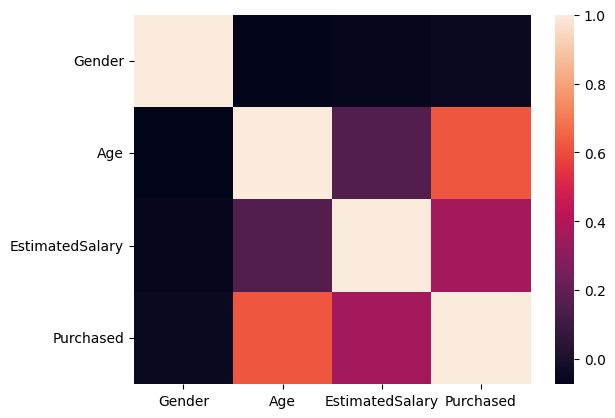

In [ ]:
sns.heatmap(df_net.corr())

In [ ]:
# Drop Gender column
df_net.drop(columns=['Gender'], inplace=True)

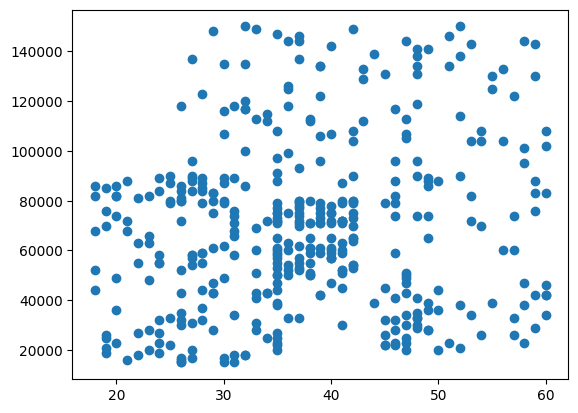

In [ ]:
# Relationship between Age and Salary
plt.scatter(df_net['Age'], df_net['EstimatedSalary'])

In [ ]:
# Split data into independent/dependent variables
X = df_net.iloc[:, :-1].values
y = df_net.iloc[:, -1].values

In [ ]:
# Split dataset into test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = True)

In [ ]:
# Scale dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Train K-Nearest Neighbour model
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
# Prediction
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]]


In [ ]:
# Accuracy
accuracy_score(y_test, y_pred)

0.88

In [ ]:
# Classification report
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.84      0.89        58
           1       0.81      0.93      0.87        42

    accuracy                           0.88       100
   macro avg       0.88      0.89      0.88       100
weighted avg       0.89      0.88      0.88       100



In [ ]:
# F1 score
print(f"F1 Score : {f1_score(y_test, y_pred)}")

F1 Score : 0.8666666666666666


<Axes: >

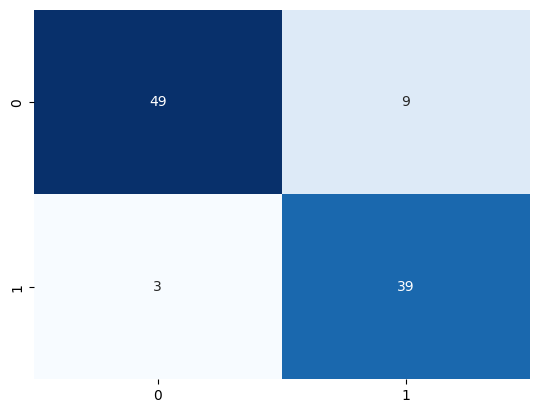

In [ ]:
# Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

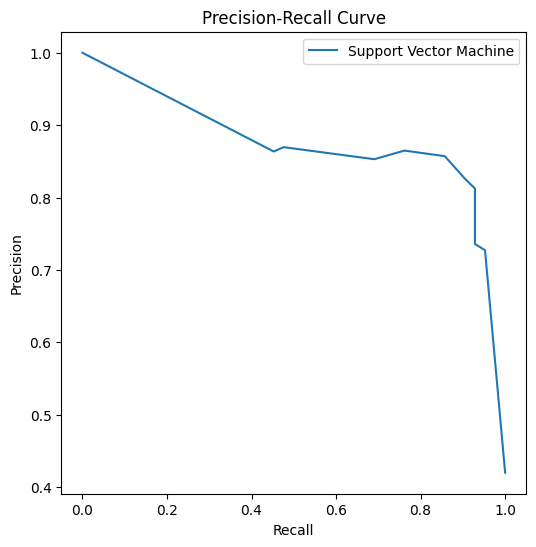

In [ ]:
# Plot Precision-Recall Curve
y_pred_proba = classifier.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(recall, precision, label='Support Vector Machine')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Precision-Recall Curve')
ax.legend();

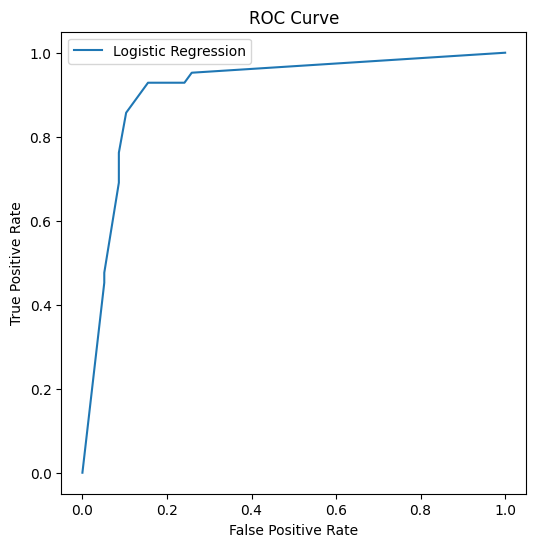

In [ ]:
# Plot AUC/ROC curve
y_pred_proba = classifier.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='Logistic Regression')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve')
ax.legend();

<ipython-input-67-a6bab2667fbf>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


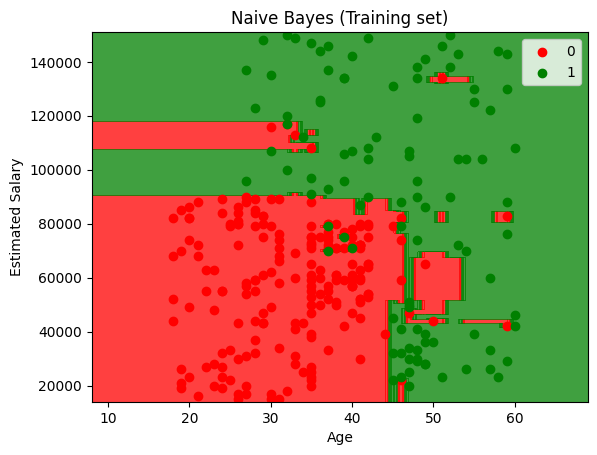

In [ ]:
# Visualize prediction results on training set
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

<ipython-input-68-a721b2449967>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


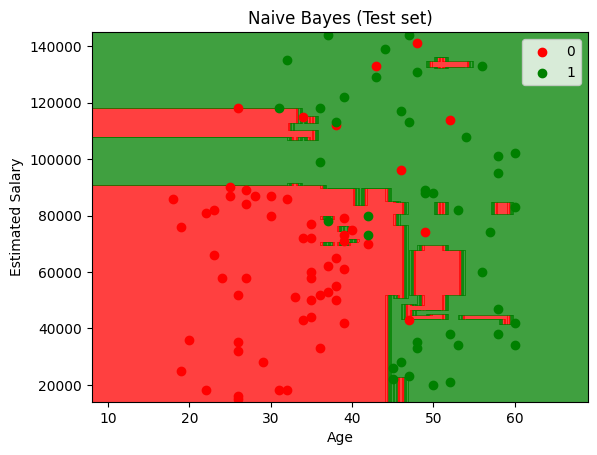

In [ ]:
# Visualize prediction results on test set
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

**Redes Neurais Artificiais**

>**O que é:**
- Redes Neurais Artificiais são compostas por neurônios chamados unidades.
- Essas unidades estão distribuídas em um conjunto de camadas que juntas formam toda a Rede Neural Artificial.
- Uma rede Neural pode ter algumas dezenas ou milhares unidades, a depender da complexidade necessária para aprender sobre os parâmetros do dataset
- A camada de entrada recebe os dados que se deseja aprender sobre, então esses dados são passados através de multiplas camadas internas, que transformam os dados em dados valiosos para a camada de saída, que então fornece uma resposta com base nesses dados
- Na maioria das redes neurais, as unidades de uma camada estão interconectadas com a outra, em que cada uma dessas conexões tem um peso que representa a influência de uma unidade na outra

>**RNA vs Neurônios Biológicos**
- O conceito de Redes Neurais Artificiais é inspirado nos neurônios encontrados em cérebros de animais
- Neurônios possuem corpo celular para processar os impulsos, dendritos para rceber eles e axônio para transmitir um novo impulso
- RNA têm camadas internas para processar os dados, Camada de entrada para receber um dado do meio externo e camada de saída para enviar uma resposta.
- Sinapses são os sinais biológicos que oermitem a transmissão dos impulsos. Já os pesos nos links entre cada unidade na RNA representam a força de uma conexão, assim como as sinapses.
- A ativação de um neurônio ocorre quando uma sinapse ultrapassa o limite , e consegue ativar o próximo neurônio. Nas RNAs, existe uma cunção, chamada função de ativação que é responsável por mapear entradas e respectivas saídas, e realizar a ativação da rede.
- O aprendizado nos neurônios ocorre no corpo celular, que possuem núcleos para ajudar a processar os impulsos. Já na RNA, o aprendizado é feito com base em um algoritmo de retropropagação, que permite o ajuste dos pesos de acordo com o erro na predição.

>**Tipos de RNA**
- **Rede Neural Feeddorward**: Uma das redes neurais mais básicas, em que o dado entra na camada de entrada, e então caminha em uma única direção, até sair da rede pela camada de saída. Nessa RNA, não há retropropagação, e podem ou não existir camadas internas.
- **Redes Neurais Convolucionais**: Possui uma ou mais camadas internas de convolução, em que cada uma delas recebe o dado na entrada, e realiza a operação de convolução sobre ele, para então passar o dado como uma saída para a próxima camada. Muito usadas em problemas de fala e processamento de imagens.
- **Redes Neurais Modulares**: Esse tipo de RNA consegue quebrar um problema complexo, e problemas mais simples, uma vez que, uma Rede Neural Modular é composta por uma coleção de diferentes redes neurais independentes umas das outras, que trabalham para chegar a uma única saída. Cada rede neural recebe entradas únicas, e realizam sub-tarefas dentro da rede
- **Redes Neurais de funções de base radial**: Funções de base radial são aquelas funções que consideram a distância de um ponto em relação ao centro. Essas redes neurais possuem duas camadas, em que, na primeira camada, a entrada é avaliada em todas as funções de base radial nas camadas internas, e então a camada de saída computa a saída no próximo passo.
- **Redes Neurais Recorrentes**: As redes neurais recorrentes salvam a saída de uma camada, e retorna essa saída de volta para a entrada, para fazer uma predição melhor.
- A rede neural recorrente se inica uma vez que a saída da pirmeira camada é computada, e a partir dessa camada, cada unidade vai se lembrar de alguma informação do passo anterior, de forma que essa unidade possa agir como uma célula de memória durante a realização dos cálculos.

>**Vantagens**:
- Robusta a ruídos e dataset incompletos
- Capacidade de modelagem não-linear
- Aplicável em várias áreas
- Computação paralela, o que significa que, se uma unidade deixar de eixstir, a rede continua funcionando
- Pode lidar com datasets de grandes dimensões

>**Desvantagens**:
- Necessidade de grande quantidade de dados de treinamento que já estejam tagueados
- Dificulta a interpretação das tomadas de decisão, modelo de caixa preta
- Grande consumo de poder computacional
- Propensa a overfitting, caso não haja um ajuste ideal
- Sensível à qualidade do dado de entrada, sendo necessário um pré-processamento

>**Casos de Uso**:
- Redes sociais: sugestões de amizade e reconhecimento facial, sendo a última utilizando redes neurais convolucionais
- Marketing e vendas: Recomendação de produtos e marketing sob medida
- Healthcare: Identificação de tumores em nível microscópico
- Assistentes pessoais: Processamento de linguagem natural em dispositivos como siri, alexa, cortana, bixby, etc.

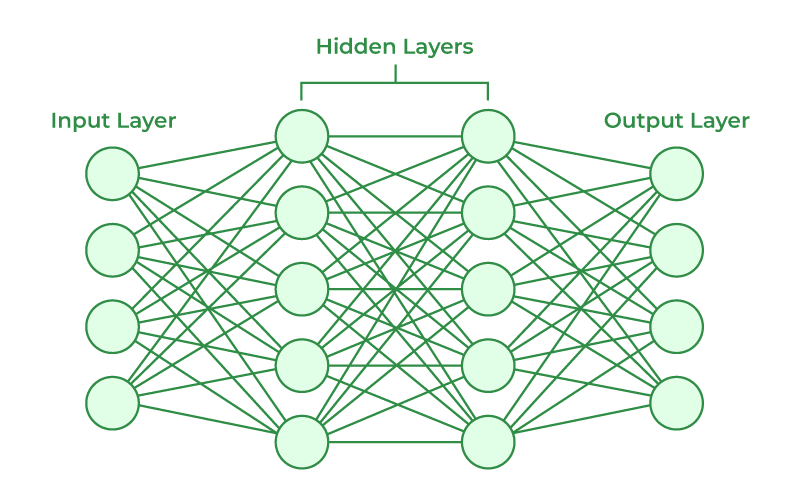

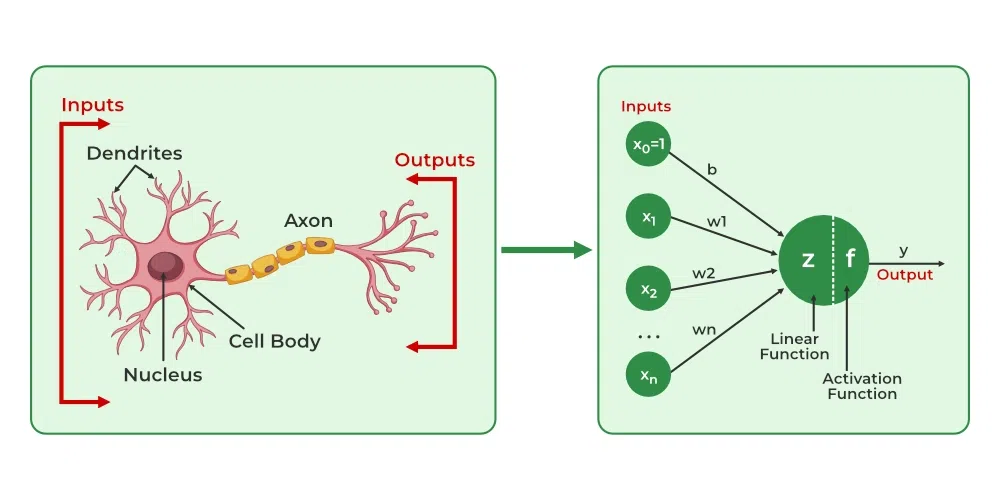



In [ ]:
from sklearn.neural_network import MLPClassifier
X = [[0., 0.], [1., 1.]]
y = [0, 1]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X, y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [ ]:
clf.predict([[2., 2.], [-1., -2.]])

array([1, 0])

In [ ]:
[coef.shape for coef in clf.coefs_]

[(2, 5), (5, 2), (2, 1)]

In [ ]:
clf.predict_proba([[2., 2.], [1., 2.]])

array([[1.96718015e-04, 9.99803282e-01],
       [1.96718015e-04, 9.99803282e-01]])

In [ ]:
X = [[0., 0.], [1., 1.]]
y = [[0, 1], [1, 1]]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(15,), random_state=1)
clf.fit(X, y)
clf.predict([[1., 2.]])
clf.predict([[0., 0.]])

array([[0, 1]])

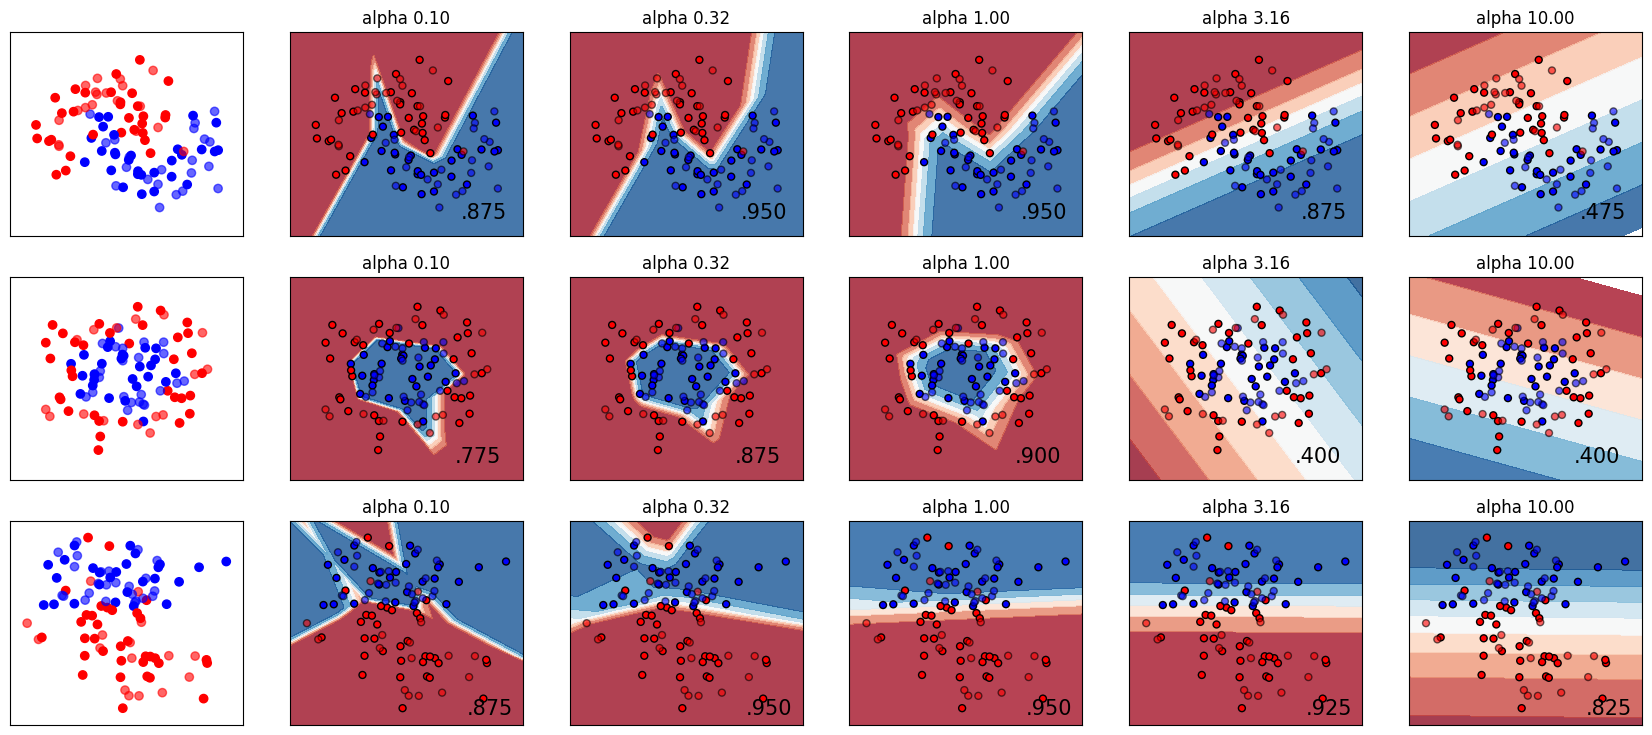

In [ ]:
# Author: Issam H. Laradji
# License: BSD 3 clause

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

h = 0.02  # step size in the mesh

alphas = np.logspace(-1, 1, 5)

classifiers = []
names = []
for alpha in alphas:
    classifiers.append(
        make_pipeline(
            StandardScaler(),
            MLPClassifier(
                solver="lbfgs",
                alpha=alpha,
                random_state=1,
                max_iter=2000,
                early_stopping=True,
                hidden_layer_sizes=[10, 10],
            ),
        )
    )
    names.append(f"alpha {alpha:.2f}")

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=0, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(17, 9))
i = 1
# iterate over datasets
for X, y in datasets:
    # split into training and test part
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max] x [y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.column_stack([xx.ravel(), yy.ravel()]))
        else:
            Z = clf.predict_proba(np.column_stack([xx.ravel(), yy.ravel()]))[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        # Plot also the training points
        ax.scatter(
            X_train[:, 0],
            X_train[:, 1],
            c=y_train,
            cmap=cm_bright,
            edgecolors="black",
            s=25,
        )
        # and testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            alpha=0.6,
            edgecolors="black",
            s=25,
        )

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            f"{score:.3f}".lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

figure.subplots_adjust(left=0.02, right=0.98)
plt.show()

In [ ]:
pip install tensorflow

In [ ]:
pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 3.9 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras import models, layers, utils, backend as K
import matplotlib.pyplot as plt
import shap

In [ ]:
model = models.Sequential(name="Perceptron", layers=[
    layers.Dense(             #a fully connected layer
          name="dense",
          input_dim=3,        #with 3 features as the input
          units=1,            #and 1 node because we want 1 output
          activation='linear' #f(x)=x
    )
])
model.summary()

Model: "Perceptron"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# define the function
import tensorflow as tf
def binary_step_activation(x):
    ##return 1 if x>0 else 0
    return K.switch(x>0, tf.math.divide(x,x), tf.math.multiply(x,0))

# build the model
model = models.Sequential(name="Perceptron", layers=[
      layers.Dense(
          name="dense",
          input_dim=3,
          units=1,
          activation=binary_step_activation
      )
])

In [ ]:
n_features = 10
model = models.Sequential(name="DeepNN", layers=[
    ### hidden layer 1
    layers.Dense(name="h1", input_dim=n_features,
                 units=int(round((n_features+1)/2)),
                 activation='relu'),
    layers.Dropout(name="drop1", rate=0.2),

    ### hidden layer 2
    layers.Dense(name="h2", units=int(round((n_features+1)/4)),
                 activation='relu'),
    layers.Dropout(name="drop2", rate=0.2),

    ### layer output
    layers.Dense(name="output", units=1, activation='sigmoid')
])
model.summary()

Model: "DeepNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1 (Dense)                  (None, 6)                 66        
                                                                 
 drop1 (Dropout)             (None, 6)                 0         
                                                                 
 h2 (Dense)                  (None, 3)                 21        
                                                                 
 drop2 (Dropout)             (None, 3)                 0         
                                                                 
 output (Dense)              (None, 1)                 4         
                                                                 
Total params: 91 (364.00 Byte)
Trainable params: 91 (364.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Perceptron
inputs = layers.Input(name="input", shape=(3,))
outputs = layers.Dense(name="output", units=1,
                       activation='linear')(inputs)
model = models.Model(inputs=inputs, outputs=outputs,
                     name="Perceptron")

# DeepNN
### layer input
inputs = layers.Input(name="input", shape=(n_features,))
### hidden layer 1
h1 = layers.Dense(name="h1", units=int(round((n_features+1)/2)), activation='relu')(inputs)
h1 = layers.Dropout(name="drop1", rate=0.2)(h1)
### hidden layer 2
h2 = layers.Dense(name="h2", units=int(round((n_features+1)/4)), activation='relu')(h1)
h2 = layers.Dropout(name="drop2", rate=0.2)(h2)
### layer output
outputs = layers.Dense(name="output", units=1, activation='sigmoid')(h2)
model = models.Model(inputs=inputs, outputs=outputs, name="DeepNN")

In [ ]:
'''
Extract info for each layer in a keras model.
'''
def utils_nn_config(model):
    lst_layers = []
    if "Sequential" in str(model): #-> Sequential doesn't show the input layer
        layer = model.layers[0]
        lst_layers.append({"name":"input", "in":int(layer.input.shape[-1]), "neurons":0,
                           "out":int(layer.input.shape[-1]), "activation":None,
                           "params":0, "bias":0})
    for layer in model.layers:
        try:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":layer.units,
                         "out":int(layer.output.shape[-1]), "activation":layer.get_config()["activation"],
                         "params":layer.get_weights()[0], "bias":layer.get_weights()[1]}
        except:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":0,
                         "out":int(layer.output.shape[-1]), "activation":None,
                         "params":0, "bias":0}
        lst_layers.append(dic_layer)
    return lst_layers



'''
Plot the structure of a keras neural network.
'''
def visualize_nn(model, description=False, figsize=(10,8)):
    ## get layers info
    lst_layers = utils_nn_config(model)
    layer_sizes = [layer["out"] for layer in lst_layers]

    ## fig setup
    fig = plt.figure(figsize=figsize)
    ax = fig.gca()
    ax.set(title=model.name)
    ax.axis('off')
    left, right, bottom, top = 0.1, 0.9, 0.1, 0.9
    x_space = (right-left) / float(len(layer_sizes)-1)
    y_space = (top-bottom) / float(max(layer_sizes))
    p = 0.025

    ## nodes
    for i,n in enumerate(layer_sizes):
        top_on_layer = y_space*(n-1)/2.0 + (top+bottom)/2.0
        layer = lst_layers[i]
        color = "green" if i in [0, len(layer_sizes)-1] else "blue"
        color = "red" if (layer['neurons'] == 0) and (i > 0) else color

        ### add description
        if (description is True):
            d = i if i == 0 else i-0.5
            if layer['activation'] is None:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
            else:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
                plt.text(x=left+d*x_space, y=top-p, fontsize=10, color=color, s=layer['activation']+" (")
                plt.text(x=left+d*x_space, y=top-2*p, fontsize=10, color=color, s="Σ"+str(layer['in'])+"[X*w]+b")
                out = " Y"  if i == len(layer_sizes)-1 else " out"
                plt.text(x=left+d*x_space, y=top-3*p, fontsize=10, color=color, s=") = "+str(layer['neurons'])+out)

        ### circles
        for m in range(n):
            color = "limegreen" if color == "green" else color
            circle = plt.Circle(xy=(left+i*x_space, top_on_layer-m*y_space-4*p), radius=y_space/4.0, color=color, ec='k', zorder=4)
            ax.add_artist(circle)

            ### add text
            if i == 0:
                plt.text(x=left-4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$X_{'+str(m+1)+'}$')
            elif i == len(layer_sizes)-1:
                plt.text(x=right+4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$y_{'+str(m+1)+'}$')
            else:
                plt.text(x=left+i*x_space+p, y=top_on_layer-m*y_space+(y_space/8.+0.01*y_space)-4*p, fontsize=10, s=r'$H_{'+str(m+1)+'}$')

    ## links
    for i, (n_a, n_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer = lst_layers[i+1]
        color = "green" if i == len(layer_sizes)-2 else "blue"
        color = "red" if layer['neurons'] == 0 else color
        layer_top_a = y_space*(n_a-1)/2. + (top+bottom)/2. -4*p
        layer_top_b = y_space*(n_b-1)/2. + (top+bottom)/2. -4*p
        for m in range(n_a):
            for o in range(n_b):
                line = plt.Line2D([i*x_space+left, (i+1)*x_space+left],
                                  [layer_top_a-m*y_space, layer_top_b-o*y_space],
                                  c=color, alpha=0.5)
                if layer['activation'] is None:
                    if o == m:
                        ax.add_artist(line)
                else:
                    ax.add_artist(line)
    plt.show()

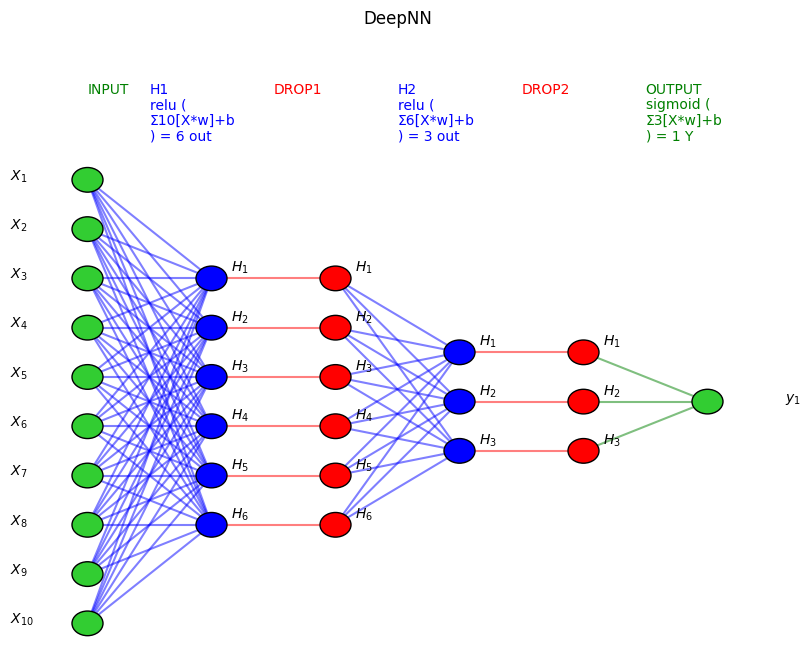

In [ ]:
visualize_nn(model, description=True, figsize=(10,8))

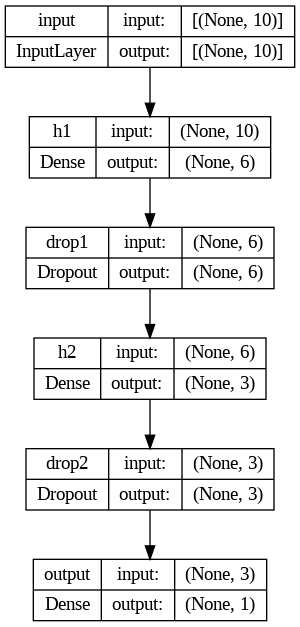

In [ ]:
utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
import os
os.remove('model.png')

In [ ]:
# define metrics
def Recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def Precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def F1(y_true, y_pred):
    precision = Precision(y_true, y_pred)
    recall = Recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the neural network
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy',F1])

In [ ]:
# define metrics
def R2(y, y_hat):
    ss_res =  K.sum(K.square(y - y_hat))
    ss_tot = K.sum(K.square(y - K.mean(y)))
    return ( 1 - ss_res/(ss_tot + K.epsilon()) )

# compile the neural network
model.compile(optimizer='adam', loss='mean_absolute_error',
              metrics=[R2])

In [ ]:
import numpy as np
X = np.random.rand(1000,10)
y = np.random.choice([1,0], size=1000)

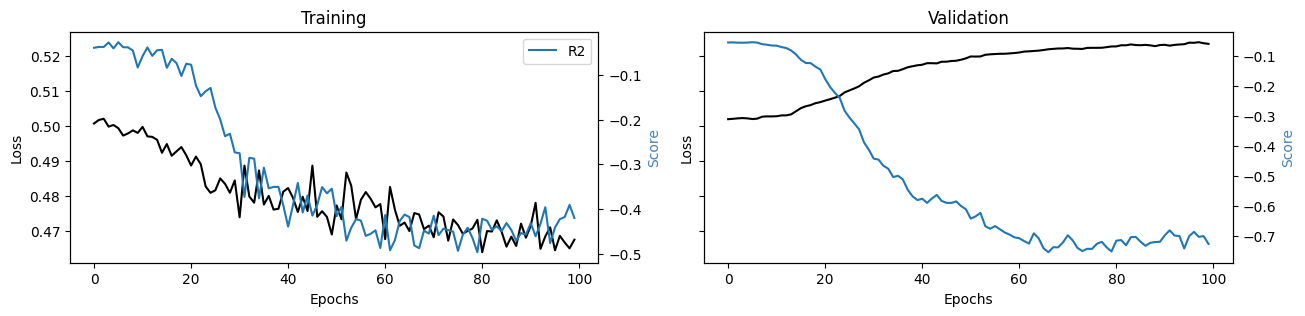

In [ ]:
# train/validation
training = model.fit(x=X, y=y, batch_size=32, epochs=100, shuffle=True, verbose=0, validation_split=0.3)

# plot
metrics = [k for k in training.history.keys() if ("loss" not in k) and ("val" not in k)]
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,3))

## training
ax[0].set(title="Training")
ax11 = ax[0].twinx()
ax[0].plot(training.history['loss'], color='black')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss', color='black')
for metric in metrics:
    ax11.plot(training.history[metric], label=metric)
    ax11.set_ylabel("Score", color='steelblue')
ax11.legend()

## validation
ax[1].set(title="Validation")
ax22 = ax[1].twinx()
ax[1].plot(training.history['val_loss'], color='black')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss', color='black')
for metric in metrics:
    ax22.plot(training.history['val_'+metric], label=metric)
    ax22.set_ylabel("Score", color="steelblue")
plt.show()

In [ ]:
'''
Use shap to build an a explainer.
:parameter
    :param model: model instance (after fitting)
    :param X_names: list
    :param X_instance: array of size n x 1 (n,)
    :param X_train: array - if None the model is simple machine learning, if not None then it's a deep learning model
    :param task: string - "classification", "regression"
    :param top: num - top features to display
:return
    dtf with explanations
'''
def explainer_shap(model, X_names, X_instance, X_train=None, task="classification", top=10):
    ## create explainer
    ### machine learning
    if X_train is None:
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_instance)
    ### deep learning
    else:
        explainer = shap.DeepExplainer(model, data=X_train[:100])
        shap_values = explainer.shap_values(X_instance.reshape(1,-1))[0].reshape(-1)

    ## plot
    ### classification
    if task == "classification":
        shap.decision_plot(explainer.expected_value, shap_values, link='logit', feature_order='importance',
                           features=X_instance, feature_names=X_names, feature_display_range=slice(-1,-top-1,-1))
    ### regression
    else:
        shap.waterfall_plot(explainer.expected_value[0], shap_values,
                            features=X_instance, feature_names=X_names, max_display=top)

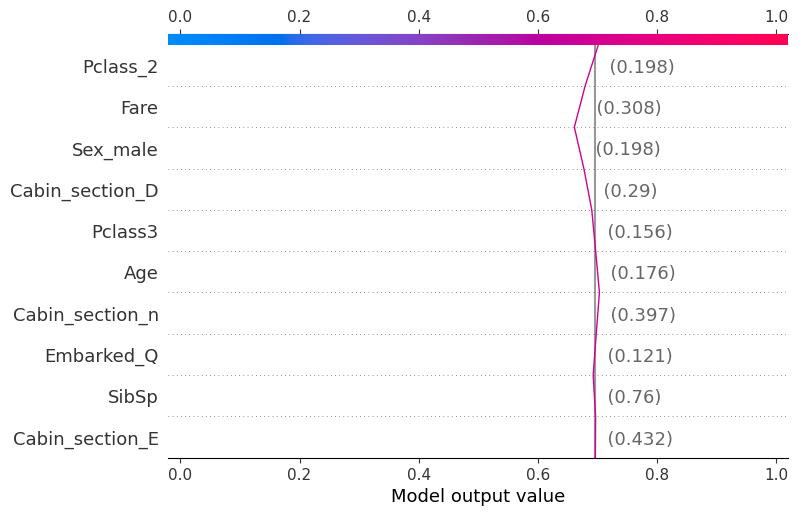

In [ ]:
i = 1
list_feature_names = ["Sex_male", "Cabin_section_D", "Fare", "Pclass_2", "SibSp", "Embarked_Q", "Pclass3", "Cabin_section_n", "Cabin_section_E", "Age"]

explainer_shap(model,
               X_names=list_feature_names,
               X_instance=X[i],
               X_train=X,
               task="classification", #task="regression"
               top=10)

# Aprendizado Não Supervisionado

Usa algoritmos de ML para encontrar padrões ocultos ou agrupamento de dados para dados não rotulados. Sua capacidade de descobrir semelhanças e diferenças nas informações o torna a solução ideal para análise exploratória de dados, estratégias de vendas cruzadas, segmentação de clientes e reconhecimento de imagem.

Algumas de suas aplicações:
* *Seções de notícias:* o Google News usa aprendizado não supervisionado para
categorizar artigos sobre a mesma história de várias agências de notícias. Por exemplo, os resultados de uma eleição presidencial podem ser categorizados sob o rótulo de notícias dos “EUA”.
* *Computer vision:* algoritmos de aprendizado não supervisionado são usados para tarefas de percepção visual, como reconhecimento de objetos.  
* *Imagiologia médica:* o machine learning não supervisionado fornece recursos essenciais aos dispositivos de imagiologia médica, como a detecção, a classificação e a segmentação de imagens, usadas em radiologia e patologia para diagnosticar pacientes de forma rápida e precisa.
* *Detecção de anomalias:* modelos de aprendizado não supervisionado podem vasculhar através de grandes quantidades de dados e descobrir pontos de dados atípicos em um conjunto de dados. Estas anomalias podem aumentar a conscientização sobre equipamento defeituoso, erro humano ou violações na segurança.
* *Personas de clientes:* definir as personas de clientes facilita entender características comuns e os hábitos de compras de clientes de negócios. O aprendizado não supervisionado permite que as empresas construam melhores perfis de personas de compradores, permitindo que organizações alinhem as mensagens de seus produtos de forma mais adequada.
* *Mecanismos de recomendação:* usando dados de comportamento de compras passados, o aprendizado não supervisionado pode ajudar a descobrir tendências de dados que podem ser usadas para desenvolver estratégias mais eficazes de venda cruzada. Isso é usado para fazer recomendações complementares relevantes aos clientes durante o processo de finalização de compra dos varejistas on-line.


## **K-Means**

K-Means é um algoritmo de clusterização (ou agrupamento) disponível na biblioteca Scikit-Learn.

É um algoritmo de aprendizado não supervisionado (ou seja, que não precisa de inputs de confirmação externos) que avalia e clusteriza os dados de acordo com suas características, como por exemplo:
* clientes/produtos ou serviços semelhantes
* clientes/características semelhantes
* séries/gênero da série ou faixa etaria
* usuarios de uma rede social/usuario influenciador
* paciente/sintoma ou característica semelhante
* lojas/centro logistico

Por exemplo, se eu tenho uma rede de lojas com abrangência nacional, qual seria os melhores lugares para construir os centros logísticos de abastecimento? Com K-Means podemos ter essa resposta.

O K-Means funciona da seguinte maneira:
* Primeiro, preciso definir um ‘K’, ou seja, um número de clusters (ou agrupamentos).
* Depois, preciso definir, aleatoriamente, um centroide para cada cluster.
* O próximo passo é calcular, para cada ponto, o centroide de menor distância. Cada ponto pertencerá ao centroide mais próximo (lembrar do exemplo do CD logístico e das lojas: cada loja (ponto) deve ser atendida pelo CD (centróide) mais próximo)
* Agora, devo reposicionar o centróide. A nova posição do centroide deve ser a média da posição de todos os pontos do cluster.
Os dois ultimos passos são repetidos, iterativamente, até obtermos a posição ideal dos centróides.

**Vantagens do K-Means:**

1. **Simplicidade e Facilidade de Implementação**: K-Means é fácil de entender e implementar. Seu processo iterativo de atribuir pontos ao cluster mais próximo e depois recalcular os centróides é intuitivo.

2. **Eficiência**: Em termos computacionais, K-Means é bastante eficiente, especialmente em grandes conjuntos de dados, devido à sua complexidade linear.

3. **Facilmente Adaptável**: Pode ser facilmente adaptado para diferentes tipos de dados e dimensões.

4. **Bom para Prototipagem Rápida**: Devido à sua simplicidade, K-Means é bom para uma primeira análise exploratória e pode fornecer resultados rápidos em protótipos.

5. **Facilidade de Interpretação**: Os resultados do K-Means são fáceis de interpretar, tornando-o uma boa escolha para aplicações de negócios.

**Desvantagens do K-Means:**

1. **Necessidade de Especificar o Número de Clusters**: Uma das principais desvantagens é a necessidade de definir a priori o número de clusters (k), o que pode ser difícil sem conhecimento prévio e pode exigir métodos adicionais para determinar.

2. **Sensibilidade a Outliers**: O K-Means é sensível a outliers, pois eles podem influenciar significativamente a posição dos centróides.

3. **Convergência para Mínimos Locais**: O K-Means pode convergir para mínimos locais, dependendo do ponto de partida inicial dos centróides. Isso significa que diferentes execuções podem levar a resultados diferentes.

4. **Clustering Esférico**: K-Means assume que os clusters são esféricos e igualmente dimensionados, o que pode não ser o caso em muitos conjuntos de dados reais, levando a resultados inadequados para clusters de formas irregulares.

5. **Dificuldade com Diferentes Densidades**: K-Means tem dificuldade em lidar com clusters de diferentes densidades, tamanhos ou formas não esféricas.

6. **Dados Categóricos**: K-Means não funciona bem com dados categóricos, pois é baseado em distâncias euclidianas.

Em resumo, o K-Means pode ser uma excelente ferramenta de análise inicial e para conjuntos de dados onde as suposições do algoritmo são razoavelmente satisfeitas. No entanto, para dados mais complexos ou quando não se sabe quantos clusters procurar, pode ser necessário usar algoritmos de clustering mais avançados ou técnicas adicionais para determinar o número adequado de clusters.

Na prática, K-Means funciona da seguinte maneira:

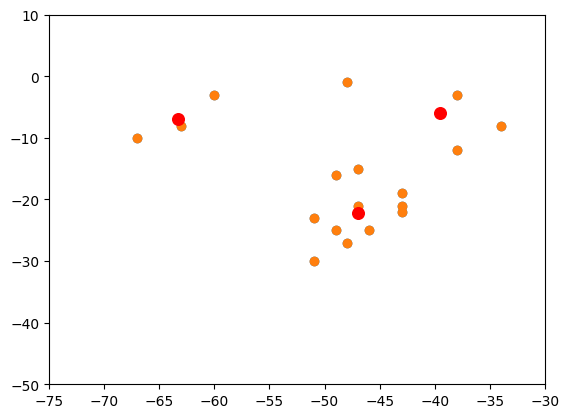

In [ ]:
import numpy as np #para manipular os vetores
from matplotlib import pyplot as plt #para plotar os gráficos
from sklearn.cluster import KMeans #para usar o KMeans

dataset = np.array(
#matriz com as coordenadas geográficas de cada loja
[[-25, -46], #são paulo
[-22, -43], #rio de janeiro
[-25, -49], #curitiba
[-30, -51], #porto alegre
[-19, -43], #belo horizonte
[-15, -47], #brasilia
[-12, -38], #salvador
[-8, -34], #recife
[-16, -49], #goiania
[-3, -60], #manaus
[-22, -47], #campinas
[-3, -38], #fortaleza
[-21, -47], #ribeirão preto
[-23, -51], #maringa
[-27, -48], #florianópolis
[-21, -43], #juiz de fora
[-1, -48], #belém
[-10, -67], #rio branco
[-8, -63] #porto velho
 ])
plt.scatter(dataset[:,1], dataset[:,0]) #posicionamento dos eixos x e y
plt.xlim(-75, -30) #range do eixo x
plt.ylim(-50, 10) #range do eixo y
plt.grid() #função que desenha a grade no nosso gráfico

kmeans = KMeans(n_clusters = 3, #numero de clusters
init = 'random', n_init = 10, #algoritmo que define a posição dos clusters de maneira mais assertiva
max_iter = 100) #numero máximo de iterações
pred_y = kmeans.fit_predict(dataset)
plt.scatter(dataset[:,1], dataset[:,0]) #posicionamento dos eixos x e y
plt.xlim(-75, -30) #range do eixo x
plt.ylim(-50, 10) #range do eixo y
plt.grid() #função que desenha a grade no nosso gráfico
plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,0], s = 70, c = 'red') #posição de cada centroide no gráfico
plt.show()

Agora, nossos centros logísticos ficariam nos seguintes locais correspondentes:

[-7.01, -63.33] — Beruri/AM

[-6.01, -39.482] — Boa Viagem/CE

[-22.175, -46.976] — Consolação/MG

## **DBSCAN**

O DBSCAN (Density-Based Spatial Clustering of Applications with Noise) é um algoritmo de agrupamento baseado em densidade que pode identificar clusters de forma arbitrária e é eficaz na identificação de outliers. Diferente do K-Means, o DBSCAN não requer que o usuário especifique o número de clusters a priori.
Este possui uma abordagem de agrupamento baseado na densidade. A densidade de pontos em determinada região é responsável pela formação dos clusters. Caso um determinado ponto não obedeça critérios de densidade ou critérios dos limites de distância, este não pode ser classificado em um cluster.


**Como o DBSCAN funciona:**

1. **Parâmetros**: O algoritmo tem dois parâmetros principais: `eps` (epsilon), que define o raio de vizinhança ao redor de um ponto, e `minPts`, o número mínimo de pontos necessários para formar uma região densa.

2. **Pontos de Núcleo**: Um ponto é considerado um ponto de núcleo se tiver pelo menos `minPts` dentro de seu raio `eps`. Esses pontos são considerados suficientemente densos.

3. **Pontos de Fronteira e Ruído**: Pontos que não são pontos de núcleo, mas estão próximos de um ponto de núcleo, são considerados pontos de fronteira. Pontos que não são nem pontos de núcleo nem pontos de fronteira são considerados ruído (*outliers*).

4. **Formação de Clusters**: O algoritmo começa com um ponto de núcleo aleatório e encontra todos os pontos de núcleo conectados para formar um cluster. Em seguida, ele expande o cluster encontrando todos os pontos de núcleo conectáveis até que não haja mais pontos de núcleo alcançáveis dentro de `eps`.

5. **Processo Iterativo**: O processo é repetido para todos os pontos que ainda não foram visitados ou classificados em um cluster ou como ruído.

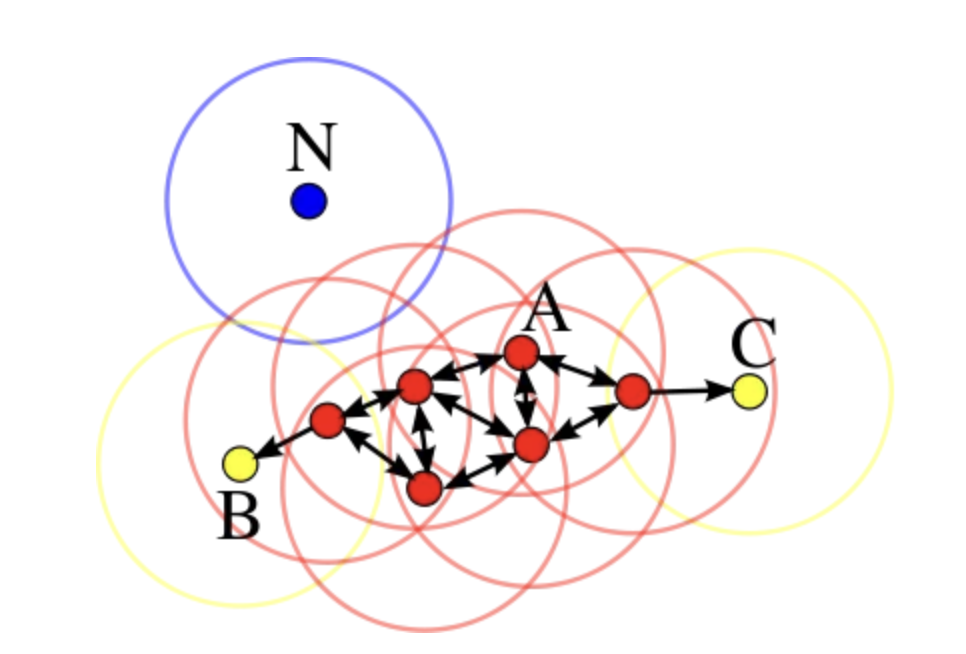
Pontos vermelhos são núcleos, amarelos bordas e azuis ruídos

**Vantagens do DBSCAN:**

- **Descoberta de Clusters de Formas Arbitrárias**: O DBSCAN pode encontrar clusters de qualquer forma, ao contrário do K-Means, que assume que os clusters são convexos (forma regular esférica ou elíptica).

- **Robusto a Outliers**: Pontos de ruído são identificados e não incluídos em clusters, tornando o DBSCAN menos sensível a outliers do que o K-Means.

- **Não Necessita do Número de Clusters**: Não é necessário especificar o número de clusters de antemão, pois o algoritmo os determina com base na densidade.

- **Capacidade de Lidar com Dados de Diferentes Densidades**: É capaz de identificar clusters com densidades variadas.

**Desvantagens do DBSCAN:**

- **Seleção de Parâmetros**: A escolha de `eps` e `minPts` pode ser difícil, especialmente em dados de dimensionalidade mais alta, e pode ter um grande impacto nos resultados.

- **Densidade Variável**: Em dados onde a densidade varia significativamente, o DBSCAN pode ter dificuldade em encontrar um parâmetro `eps` que se adapte a todas as regiões dos dados.

- **Desempenho em Alta Dimensionalidade**: O desempenho e a significância da medida de densidade podem diminuir em espaços de alta dimensionalidade, um fenômeno conhecido como a "maldição da dimensionalidade".

- **Desempenho Computacional**: Pode ser computacionalmente mais caro que o K-Means, especialmente quando os parâmetros não são bem escolhidos.

O DBSCAN é amplamente utilizado em várias aplicações, como detecção de anomalias, segmentação espacial e agrupamento de dados geográficos. É uma escolha robusta para dados que apresentam clusters de densidade e formas variadas.

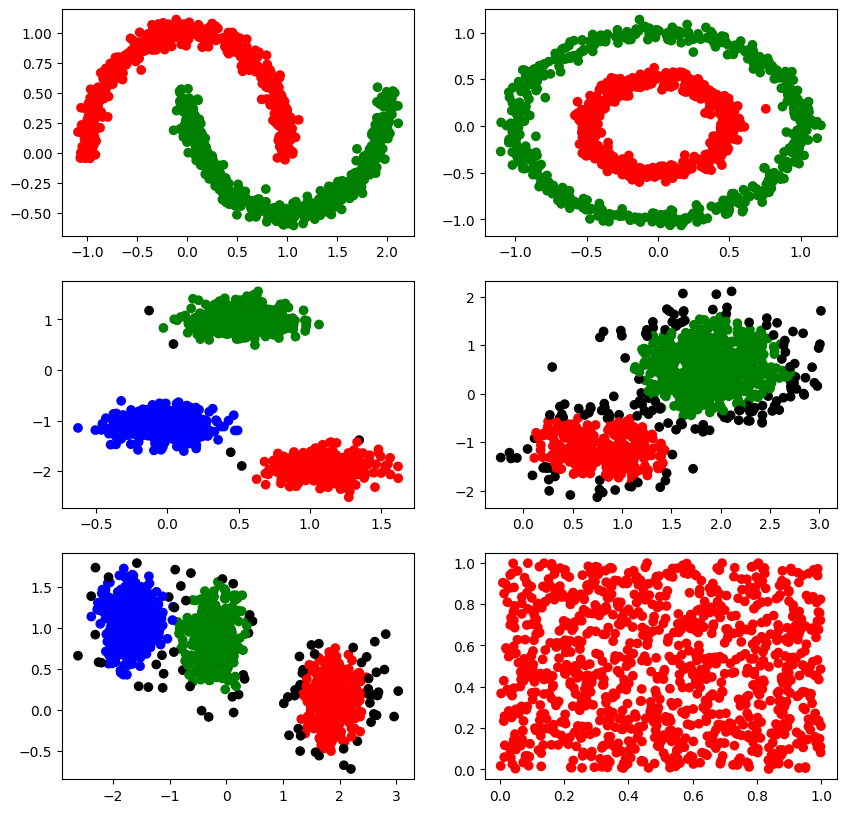

In [ ]:
import numpy as np
from sklearn import cluster, datasets
import matplotlib.pyplot as plt

n_samples = 1000
noisy_moons, _ = datasets.make_moons(n_samples=n_samples, noise=.05)
noisy_circles, _ = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
blobs1, _ = datasets.make_blobs(n_samples=n_samples, random_state=10, center_box=(-2, 2),cluster_std=0.2)
blobs2, _ = datasets.make_blobs(n_samples=n_samples, random_state=4, center_box=(-2, 2),cluster_std=0.4)
blobs3, _ = datasets.make_blobs(n_samples=n_samples, random_state=7, center_box=(-2, 2),cluster_std=0.3)
no_structure, _ = np.random.rand(n_samples, 2), None

examples = [noisy_moons, noisy_circles, blobs1, blobs2, blobs3, no_structure]

from sklearn.cluster import DBSCAN

plt.figure(figsize=(10, 10))

colours = {}
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[3] = 'y'
colours[4] = 'c'
colours[5] = 'm'
colours[6] = 'tab:pink'
colours[7] = 'tab:orange'
colours[8] = 'tab:olive'
colours[9] = 'tab:brown'
colours[-1] = 'k'

for num, i in enumerate(examples):
  db_default = DBSCAN(eps = 0.2, min_samples = 20).fit(i)
  labels = db_default.labels_

  cvec = [colours[label] for label in labels]

  plt.subplot(3, 2, num+1)
  plt.scatter(i[:, 0], i[:, 1], color = cvec)
plt.show()

In [ ]:
from IPython.display import Image
Image(url='https://miro.medium.com/v2/resize:fit:1200/format:webp/0*E_8qzUhgWG3dudf5.gif')

## **Clustering Hierárquico**

O clustering hierárquico é uma técnica de análise de agrupamento que constrói uma hierarquia de clusters. Existem dois tipos principais de clustering hierárquico: aglomerativo (bottom-up) e divisivo (top-down).

**Como Funciona o Clustering Hierárquico Aglomerativo:**

1. **Início com Clusters Individuais**: Inicialmente, cada ponto de dado é considerado como um cluster individual.

2. **Combinação de Clusters**: Em cada etapa, os dois clusters mais próximos (de acordo com um critério de distância definido, como distância euclidiana, de Manhattan, etc.) são combinados.

3. **Construção de um Dendrograma**: O processo de combinação continua até que todos os pontos de dados estejam no mesmo cluster. O histórico de combinações é representado em um dendrograma, que é uma árvore que mostra a ordem e os níveis de combinações.

4. **Corte do Dendrograma**: Para obter um número específico de clusters, o dendrograma é cortado em um determinado nível.

O clustering divisivo é a abordagem oposta ao clustering aglomerativo dentro do contexto do clustering hierárquico. Enquanto o método aglomerativo começa com cada ponto como um cluster individual e os combina progressivamente, o método divisivo começa com todos os pontos de dados em um único cluster e os divide progressivamente em clusters menores. Aqui está uma visão geral de como funciona o clustering divisivo:

**Como Funciona o Clustering Divisivo:**

1. **Início com um Único Cluster**: Inicialmente, todos os pontos de dados são considerados parte de um único grande cluster.

2. **Divisão de Clusters**: Em cada etapa, um cluster é dividido em clusters menores. A escolha de qual cluster dividir e como dividir pode depender de vários critérios, como a distância entre os pontos, a densidade, ou algum critério específico do domínio.

3. **Critérios de Divisão**: Um método comum para divisão é usar algum tipo de algoritmo de clustering não hierárquico, como K-Means, para dividir um cluster em dois. Outra abordagem pode ser baseada na identificação de pontos ou subgrupos de pontos que estão relativamente distantes do restante do cluster.

4. **Processo Iterativo**: Este processo de divisão continua até que se atinjam critérios específicos - como um número desejado de clusters, ou até que cada ponto se torne um cluster por si só.

5. **Construção de um Dendrograma**: Semelhante ao método aglomerativo, o processo de divisão pode ser representado em um dendrograma, que mostra como os clusters são divididos progressivamente.


**Vantagens do Clustering Hierárquico:**

- **Não Necessita de Especificação do Número de Clusters**: Ao contrário do K-Means, não é necessário especificar o número de clusters de antemão. O número de clusters pode ser determinado pela análise do dendrograma.

- **Flexível com Relações de Distância**: Pode-se usar diferentes medidas de distância que podem ser adequadas para o conjunto de dados específico.

- **Dendrograma Fornecendo Insights**: O dendrograma pode ser uma ferramenta poderosa para visualizar as relações entre objetos.

- **Adequado para Dados Não-Esfericos**: Funciona bem com dados que não são esféricos e podem formar clusters em qualquer forma.

**Desvantagens do Clustering Hierárquico:**

- **Sensível a Outliers**: Clusters hierárquicos podem ser sensíveis a outliers, que podem distorcer a estrutura dos clusters.

- **Complexidade Computacional**: Especialmente para grandes conjuntos de dados, o clustering hierárquico pode ser computacionalmente caro (complexidade temporal geralmente é maior em comparação com o K-Means).

- **Irreversibilidade das Decisões de Combinação**: Uma vez que dois clusters são combinados, eles não podem ser separados em etapas posteriores no método aglomerativo.

- **Escolha de Métricas e Métodos de Ligação**: A escolha da métrica de distância e do método de ligação (como ligação simples, completa, média) pode ter um grande impacto nos resultados, e não há uma regra clara sobre qual escolher.

Em resumo, o clustering hierárquico é útil para entender as relações de dados em várias escalas de granularidade e pode ser particularmente útil para dados com uma estrutura hierárquica natural. No entanto, pode ser menos adequado para conjuntos de dados muito grandes ou para dados com muitos outliers.

In [ ]:
from IPython.display import Image, display, HTML

url_imagem = 'https://miro.medium.com/v2/resize:fit:1400/format:webp/0*GNn1WjK6pqa7Q-R9.gif'
titulo = " Funcionamento de um Clustering Aglomerativo"

display(HTML(f'<h2>{titulo}</h2>'))
display(Image(url=url_imagem))


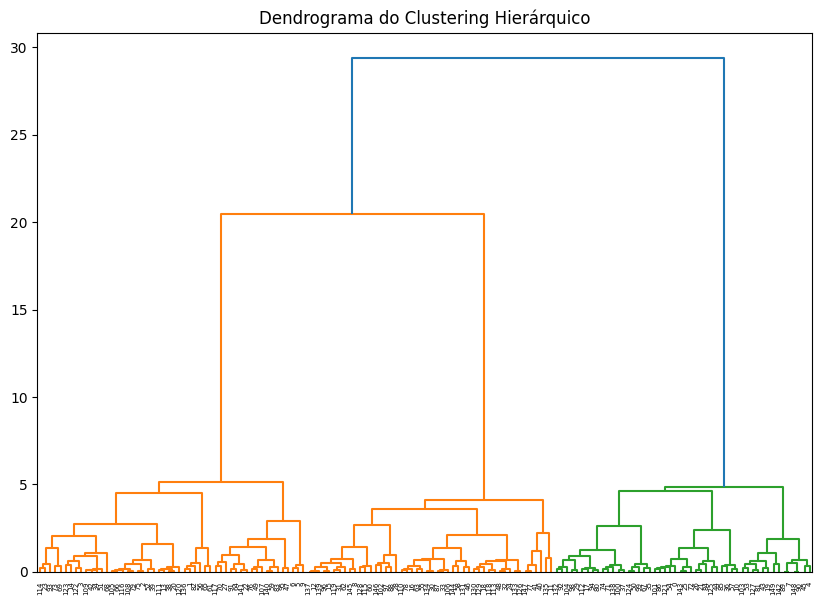

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


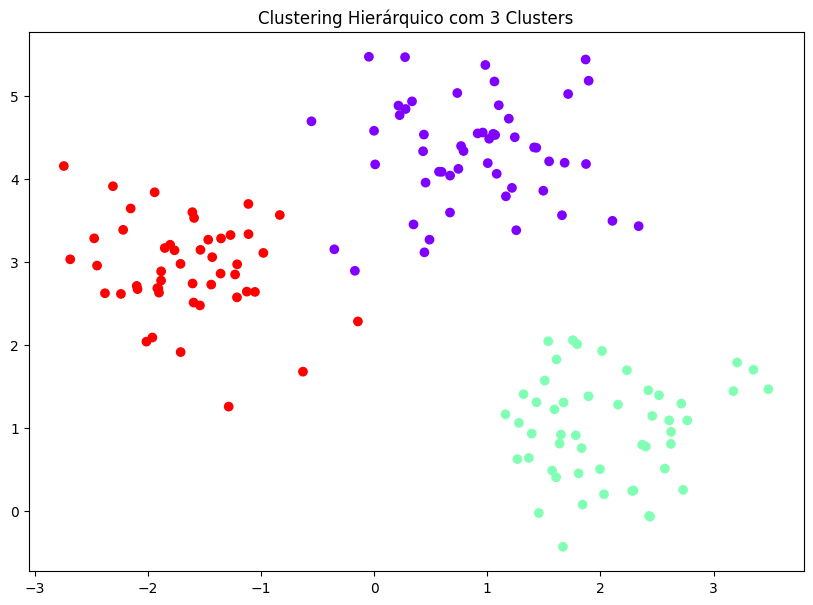

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Gerando dados sintéticos
X, y = make_blobs(n_samples=150, centers=3, cluster_std=0.60, random_state=0)

# Usando linkage para realizar o clustering hierárquico
linked = linkage(X, 'ward')

# Plotando o dendrograma
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrograma do Clustering Hierárquico')
plt.show()

# Executando Agglomerative Clustering
# Escolhendo o número de clusters com base no dendrograma
num_clusters = 3
cluster = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

# Plotando os clusters
plt.figure(figsize=(10, 7))
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow')
plt.title(f'Clustering Hierárquico com {num_clusters} Clusters')
plt.show()


## **Redes Neurais Autoencoder**

As Redes Neurais Autoencoder são uma categoria especial de redes neurais usadas principalmente para o aprendizado de representações (ou codificações) de dados. Seu objetivo é aprender uma representação compacta e eficiente dos dados de entrada, geralmente para redução de dimensionalidade ou para fins de aprendizado de características.

**Funcionamento das Redes Neurais Autoencoder:**

1. **Estrutura**: Um autoencoder típico é composto por duas partes: o codificador (encoder) e o decodificador (decoder). O codificador comprime os dados de entrada em uma representação de menor dimensão (codificação), e o decodificador tenta reconstruir os dados de entrada a partir dessa representação compacta.

2. **Treinamento**: Durante o treinamento, o autoencoder aprende minimizando a diferença entre os dados de entrada originais e sua reconstrução pelo decodificador. O objetivo é aprender uma representação (codificação) que capture as características mais importantes dos dados.

3. **Codificação**: A parte de codificação do autoencoder transforma os dados de entrada em uma representação de menor dimensão, que é uma forma comprimida dos dados.

4. **Decodificação**: A parte de decodificação tenta reconstruir os dados de volta à sua forma original a partir da representação compacta.

**Vantagens dos Autoencoders:**

- **Redução de Dimensionalidade**: Eles são excelentes para reduzir a dimensionalidade dos dados, mantendo as características mais relevantes.

- **Aprendizado de Características**: Podem aprender automaticamente as características importantes dos dados sem necessidade de supervisão.

- **Pré-processamento de Dados**: Úteis na limpeza de ruídos dos dados e como uma etapa de pré-processamento para outras tarefas de aprendizado de máquina.

- **Geração de Dados**: Autoencoders variacionais e adversários podem gerar novos dados que são semelhantes aos dados de treinamento.

**Desvantagens dos Autoencoders:**

- **Perda de Informações**: Podem perder informações que podem ser importantes para algumas tarefas específicas.

- **Risco de Sobreajuste**: Como com qualquer modelo de aprendizado de máquina, há o risco de sobreajuste, especialmente se a rede for muito complexa em relação à quantidade de dados.

- **Seleção de Arquitetura**: A escolha da arquitetura (número de camadas, número de neurônios em cada camada, etc.) pode ser desafiadora e ter um grande impacto no desempenho do modelo.

- **Dificuldade em Capturar Complexidades**: Podem ter dificuldades em capturar complexidades em dados com alta variabilidade ou estrutura muito complexa.

Autoencoders são particularmente úteis em domínios onde a redução de dimensionalidade, a limpeza de ruído ou a geração de novos dados são necessárias, mas eles requerem uma cuidadosa consideração na seleção da arquitetura e nos parâmetros de treinamento para serem eficazes.

Exemplo:

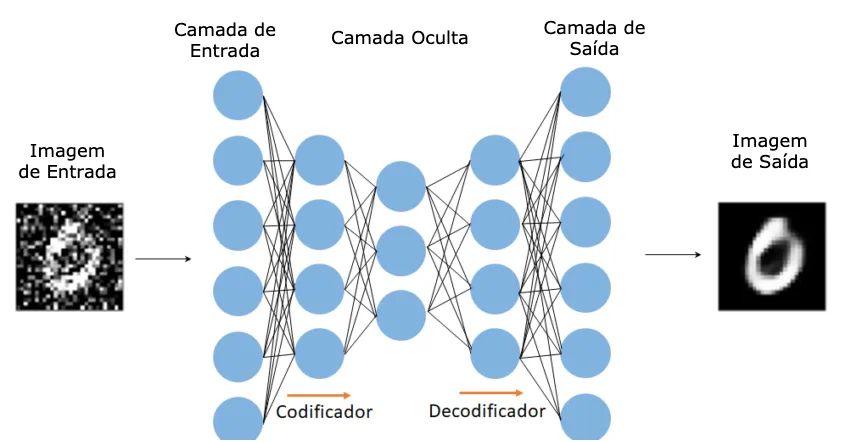

Epoch 1/50
235/235 [==============================] - 5s 16ms/step - loss: 0.2732 - val_loss: 0.1836
Epoch 2/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1677 - val_loss: 0.1515
Epoch 3/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1426 - val_loss: 0.1322
Epoch 4/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1272 - val_loss: 0.1201
Epoch 5/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1173 - val_loss: 0.1122
Epoch 6/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1107 - val_loss: 0.1068
Epoch 7/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1060 - val_loss: 0.1028
Epoch 8/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1024 - val_loss: 0.0997
Epoch 9/50
235/235 [==============================] - 3s 12ms/step - loss: 0.0997 - val_loss: 0.0974
Epoch 10/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0979 - val_loss:

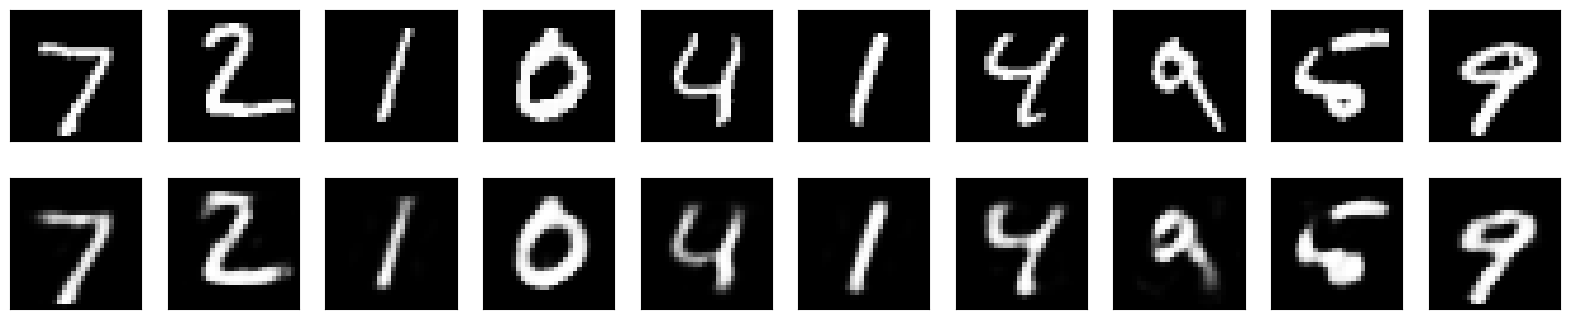

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam

# Carregar o conjunto de dados MNIST
(x_train, _), (x_test, _) = mnist.load_data()

# Normalizando os dados e transformando em vetores
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Definindo a dimensão da codificação
encoding_dim = 32  # 32 floats -> compressão de fator 24.5, assumindo a entrada é 784 floats

# Definindo a arquitetura do autoencoder
autoencoder = Sequential()
autoencoder.add(Input(shape=(784,)))
autoencoder.add(Dense(encoding_dim, activation='relu'))
autoencoder.add(Dense(784, activation='sigmoid'))

# Compilando o modelo
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Treinando o autoencoder
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Codificar e decodificar alguns dígitos
encoded_imgs = autoencoder.predict(x_test)

# Visualizando as imagens reconstruídas
n = 10  # Quantas imagens digitais queremos mostrar
plt.figure(figsize=(20, 4))
for i in range(n):
    # Imagem original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Imagem reconstruída
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


## **Apriori**

O algoritmo Apriori é uma técnica clássica de mineração de dados usada para identificar regras de associação em grandes conjuntos de dados, como em análises de cestas de compras. É amplamente usado para análise de mercado e de padrões de compra.

**Funcionalidade do Algoritmo Apriori:**

1. **Regras de Associação**: O objetivo do Apriori é identificar regras que expressam relacionamentos interessantes entre itens em um conjunto de dados. Por exemplo, em uma cesta de compras, uma regra comum pode ser "Se um cliente compra pão, também compra leite".

2. **Conceitos-Chave**: O algoritmo baseia-se em conceitos como suporte, confiança e elevação:
   - **Suporte**: Frequência com que um item ou conjunto de itens aparece no conjunto de dados.
   - **Confiança**: Frequência com que itens Y são comprados quando os itens X são comprados.
   - **Elevação**: Indica se a compra de itens X aumenta a probabilidade de compra de itens Y.

3. **Frequent Itemset Generation**: O Apriori começa identificando os conjuntos de itens (itemsets) que têm suporte acima de um limite definido. Em seguida, combina esses itemsets para formar regras.

4. **Princípio da Antimonotonicidade**: O algoritmo utiliza o princípio da antimonotonicidade do suporte: qualquer subconjunto de um itemset frequente também é frequente.

5. **Geração de Regras**: Após identificar os itemsets frequentes, o algoritmo gera regras de associação a partir desses conjuntos.

**Vantagens do Algoritmo Apriori:**

- **Simples e Fácil de Entender**: O algoritmo é conceitualmente simples e fácil de implementar.
- **Eficaz para Conjuntos de Dados Grandes**: Pode ser eficaz em conjuntos de dados grandes, desde que os itemsets frequentes não sejam excessivamente numerosos.
- **Base para Outros Métodos**: O Apriori forma a base para muitos outros algoritmos de mineração de regras de associação.

**Desvantagens do Algoritmo Apriori:**

- **Performance com Grandes Dimensões**: Pode se tornar ineficiente em conjuntos de dados com um grande número de itens únicos, devido ao grande número de possíveis combinações de itemsets.
- **Múltiplas Varreduras do Banco de Dados**: O algoritmo requer múltiplas passagens pelos dados, o que pode ser custoso em termos de tempo e computação.
- **Determinação de Limites**: A definição dos limites para suporte e confiança pode ser arbitrária e pode exigir experimentação para obter resultados significativos.

O algoritmo Apriori é fundamental na mineração de regras de associação e tem aplicações significativas em análises de cestas de compras, cross-marketing, layout de lojas, entre outros. No entanto, a escolha deste ou de outros algoritmos depende da natureza específica dos dados e dos requisitos de análise.

In [ ]:
import pandas as pd


# create sample dataset
columns = ['ID', 'Beer', 'Diaper', 'Gum', 'Soda', 'Snack']
dataset = [[1, 1, 1, 1, 1, 0],
           [2, 1, 1, 0, 0, 0],
           [3, 1, 1, 1, 0, 1],
           [4, 1, 1, 0, 1, 1],
           [5, 0, 1, 0, 1, 0],
           [6, 0, 1, 0, 0, 0],
           [7, 0, 1, 0, 0, 0],
           [8, 0, 0, 0, 1, 1],
           [9, 0, 0, 0, 1, 1]]


df = pd.DataFrame(dataset, columns=columns)
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ID  Beer  Diaper  Gum  Soda  Snack
0   1     1       1    1     1      0
1   2     1       1    0     0      0
2   3     1       1    1     0      1
3   4     1       1    0     1      1
4   5     0       1    0     1      0
5   6     0       1    0     0      0
6   7     0       1    0     0      0
7   8     0       0    0     1      1
8   9     0       0    0     1      1

In [ ]:
pip install mlxtend


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from mlxtend.frequent_patterns import apriori

class Apriori:
    """Apriori Class. Its has Apriori steps."""
    threshold = 0.5
    df = None

    def __init__(self, df, threshold=None, transform_bol=False):
        """Apriori Constructor.

        :param pandas.DataFrame df: transactions dataset (1 or 0).
        :param float threshold: set threshold for min_support.
        :return: Apriori instance.
        :rtype: Apriori
        """

        self._validate_df(df)

        self.df = df
        if threshold is not None:
            self.threshold = threshold

        if transform_bol:
            self._transform_bol()

    def _validate_df(self, df=None):
        """Validade if df exists.

        :param pandas.DataFrame df: transactions dataset (1 or 0).
        :return:
        :rtype: void
        """

        if df is None:
            raise Exception("df must be a valid pandas.DataDrame.")


    def _transform_bol(self):
        """Transform (1 or 0) dataset to (True or False).

        :return:
        :rtype: void
        """

        for column in self.df.columns:
            self.df[column] = self.df[column].apply(lambda x: True if x == 1 else False)


    def _apriori(self, use_colnames=False, max_len=None, count=True):
        """Call apriori mlxtend.frequent_patterns function.

        :param bool use_colnames: Flag to use columns name in final DataFrame.
        :param int max_len: Maximum length of itemsets generated.
        :param bool count: Flag to count length of the itemsets.
        :return: apriori DataFrame.
        :rtype: pandas.DataFrame
        """

        apriori_df = apriori(
                    self.df,
                    min_support=self.threshold,
                    use_colnames=use_colnames,
                    max_len=max_len
                )
        if count:
            apriori_df['length'] = apriori_df['itemsets'].apply(lambda x: len(x))

        return apriori_df

    def run(self, use_colnames=False, max_len=None, count=True):
        """Apriori Runner Function.

        :param bool use_colnames: Flag to use columns name in final DataFrame.
        :param int max_len: Maximum length of itemsets generated.
        :param bool count: Flag to count length of the itemsets.
        :return: apriori DataFrame.
        :rtype: pandas.DataFrame
        """

        return self._apriori(
                        use_colnames=use_colnames,
                        max_len=max_len,
                        count=count
                    )

    def filter(self, apriori_df, length, threshold):
        """Filter Apriori DataFrame by length and  threshold.

        :param pandas.DataFrame apriori_df: Apriori DataFrame.
        :param int length: Length of itemsets required.
        :param float threshold: Minimum threshold nrequired.
        :return: apriori filtered DataFrame.
        :rtype:pandas.DataFrame
        """

        if 'length' not in apriori_df.columns:
            raise Exception("apriori_df has no length. Please run the Apriori with count=True.")

        return apriori_df[ (apriori_df['length'] == length) & (apriori_df['support'] >= threshold) ]

# Running Apriori

if 'ID' in df.columns: del df['ID'] # ID is not relevant to apriori

apriori_runner = Apriori(df, threshold=0.4, transform_bol=True)
apriori_df = apriori_runner.run(use_colnames=True)
print(apriori_df)

# Showing only pairs with support granter than 0.41
filtered_apriori_df = apriori_runner.filter(apriori_df, length=2, threshold=0.41)
print(filtered_apriori_df)


    support        itemsets  length
0  0.444444          (Beer)       1
1  0.777778        (Diaper)       1
2  0.555556          (Soda)       1
3  0.444444         (Snack)       1
4  0.444444  (Diaper, Beer)       2
    support        itemsets  length
4  0.444444  (Diaper, Beer)       2


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Interpretando a saída do código:

O output do seu código Apriori representa os conjuntos de itens (itemsets) frequentes no seu conjunto de dados de transações e o suporte de cada um desses itemsets.
Essas informações podem ser úteis para entender quais itens são frequentemente comprados juntos, o que pode auxiliar em decisões de marketing, como promoções, colocação de produtos em uma loja, ou recomendações de produtos em sistemas de vendas online.

1. **Coluna 'support'**: Esta coluna mostra o suporte de cada itemset. O suporte é a proporção de transações no conjunto de dados que contêm o itemset. Por exemplo, um suporte de 0.444444 para 'Beer' significa que 'Beer' aparece em aproximadamente 44.44% de todas as transações.

2. **Coluna 'itemsets'**: Esta coluna lista os itemsets. Um itemset pode ser um único item (como 'Beer', 'Diaper', 'Soda', 'Snack') ou uma combinação de itens (como 'Beer, Diaper').

3. **Coluna 'length'**: Esta coluna mostra o número de itens em cada itemset. Por exemplo, o itemset ('Beer') tem um comprimento de 1, enquanto o itemset ('Beer, Diaper') tem um comprimento de 2.

Interpretando o Output:

- **Itemset ('Beer')**: Aparece em 44.44% das transações.
- **Itemset ('Diaper')**: Aparece em 77.78% das transações, o que indica que é um item bastante comum nas transações.
- **Itemset ('Soda')**: Aparece em 55.56% das transações.
- **Itemset ('Snack')**: Aparece em 44.44% das transações.
- **Itemset ('Beer, Diaper')**: Esta combinação de itens aparece em 44.44% das transações, o que pode indicar uma relação de compra entre cerveja e fraldas.